## **Housing Data Analysis - Delhi**

#### **Data scraped from website: https://www.housing.com/**

#### **Types of Properties scraped (based on usage): Residential Properties**

#### **Types of Properties scraped: Resale**

#### **Date of data scraping: 25 June 2021**

#### <span style='color:blue'>**Report by: Rishika Ravindran**</span>
#### **Report Date: 6 July 2021**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install dataprep
!pip install chart_studio
!pip install --upgrade plotly

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#import modules and read the dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from pandas.plotting import register_matplotlib_converters
from dataprep.eda import plot, plot_correlation, plot_missing
from dataprep.eda import create_report
import missingno as msno
%matplotlib inline 
#plt.rcParams['figure.dpi'] = 80 #high resolution --> for the plots

# Display all cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

# Interactive plotting
#import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
import cufflinks
cufflinks.go_offline()

import plotnine as gg
from plotnine import *

NumExpr defaulting to 2 threads.


In [ ]:
#set comma and  formatting
pd.options.display.float_format = "{:,.2f}".format
sns.set_theme(color_codes=True)

In [ ]:
#Defining a function to call Plotly
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
df = pd.read_csv("drive/MyDrive/housing_valuation_data.csv")
df.head()

project_name  ... clean_hash
0  Godrej South Estate  ...        nan
1  Godrej South Estate  ...        nan
2  Godrej South Estate  ...        nan
3  Godrej South Estate  ...        nan
4  Godrej South Estate  ...        nan

[5 rows x 52 columns]

In [ ]:
df.shape

(547339, 52)

In [ ]:
df.geo_division.unique()

array(['New Delhi', 'Gurgaon', 'Pune', 'Hyderabad', 'Ghaziabad', 'Noida',
       'Mumbai', 'Faridabad', 'Bangalore', 'Greater Noida', 'Chennai',
       'Thane', 'Coimbatore', 'Navi Mumbai', 'Palghar', 'Warangal',
       'Raigad District'], dtype=object)

In [ ]:
df = df.loc[df['geo_division'] == 'New Delhi'] 
df = df.reset_index(drop=True)

In [ ]:
df.shape

(67873, 52)

***After filtering for only Delhi entries, we have 67,873 rows in the dataset.***

In [ ]:
print(df.duplicated().sum())

0


***There are no duplicate records!***

# ***Exploratory Data Analysis***

***Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data.*** 

***In this report of the data analysis of the properties in Delhi, extracted from the  Housing listings website, EDA will be performed using two methods -  graphical analysis and non-graphical analysis.***

***An analysis of the residential and commercial property listings in Delhi on the Housing website***

In [ ]:
df.head()

project_name  ... clean_hash
0  Godrej South Estate  ...        nan
1  Godrej South Estate  ...        nan
2  Godrej South Estate  ...        nan
3  Godrej South Estate  ...        nan
4  Godrej South Estate  ...        nan

[5 rows x 52 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67873 entries, 0 to 67872
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   project_name         3409 non-null   object 
 1   listing_title        67873 non-null  object 
 2   listing_price        67873 non-null  object 
 3   prop_url             67873 non-null  object 
 4   prop_desc            58094 non-null  object 
 5   property_type        67873 non-null  object 
 6   floor                55382 non-null  object 
 7   total_floors         55382 non-null  float64
 8   property_age         34961 non-null  object 
 9   building_unit        911 non-null    object 
 10  locality_name        67873 non-null  object 
 11  locality_url         67873 non-null  object 
 12  address              67873 non-null  object 
 13  geo_division         67873 non-null  object 
 14  city_url             67873 non-null  object 
 15  latitude             67873 non-null 

***An overview into the data types of the columns in the dataset shows a variety of categrical and numerical eatures***

***Some of the continuous variables like built up area, property rate and plot area are also listed as objects. These variables have to be converted to a numeric format for further analysis.***

***The variables also need to be analyzed for any metric anomalies in their values***

# ***Unique Value Analysis***

In [ ]:
df_unique = df.nunique()
df_unique = df_unique.to_frame()
df_unique.columns=['Unique Count']
print("\033[1m" + "    Unique value count for each column" + "\033[0m" + "\n")
df_unique.head(48)

    Unique value count for each column



Unique Count
project_name                    7
listing_title                6536
listing_price                2491
prop_url                    67333
prop_desc                   54319
property_type                   1
floor                          76
total_floors                   48
property_age                   69
building_unit                 436
locality_name                 488
locality_url                  763
address                     14036
geo_division                    1
city_url                        1
latitude                    24071
longitude                   23837
minimum_price                  28
maximum_price                  29
prop_rate                    3737
locality_avg_rate            1005
built_up_area                1676
plot_area                     713
project_area                   28
project_size                   25
property_length               245
property_width                262
construction_status            20
possession_status             808
transaction_type                1
launch_date                    25
furnishing_status               0
developer_name                  7
advertiser_name              2908
listing_authority               9
brokerage_charge              585
prop_lister_url              3559
bedroom_count                  13
bathroom_count                 18
configurations                124
amenities_list                698
internal_features              42
external_features             338
rera_status                     2
rera_number                    55
posted_on                     715
scraped_date                    0
last_downloaded             51317

In [ ]:
dfm = df.copy()
dfm = dfm.drop(columns=['minimum_price', 'clean_hash', 'scraped_date', 'maximum_price','launch_date'])

# ***Missing Value Analysis***

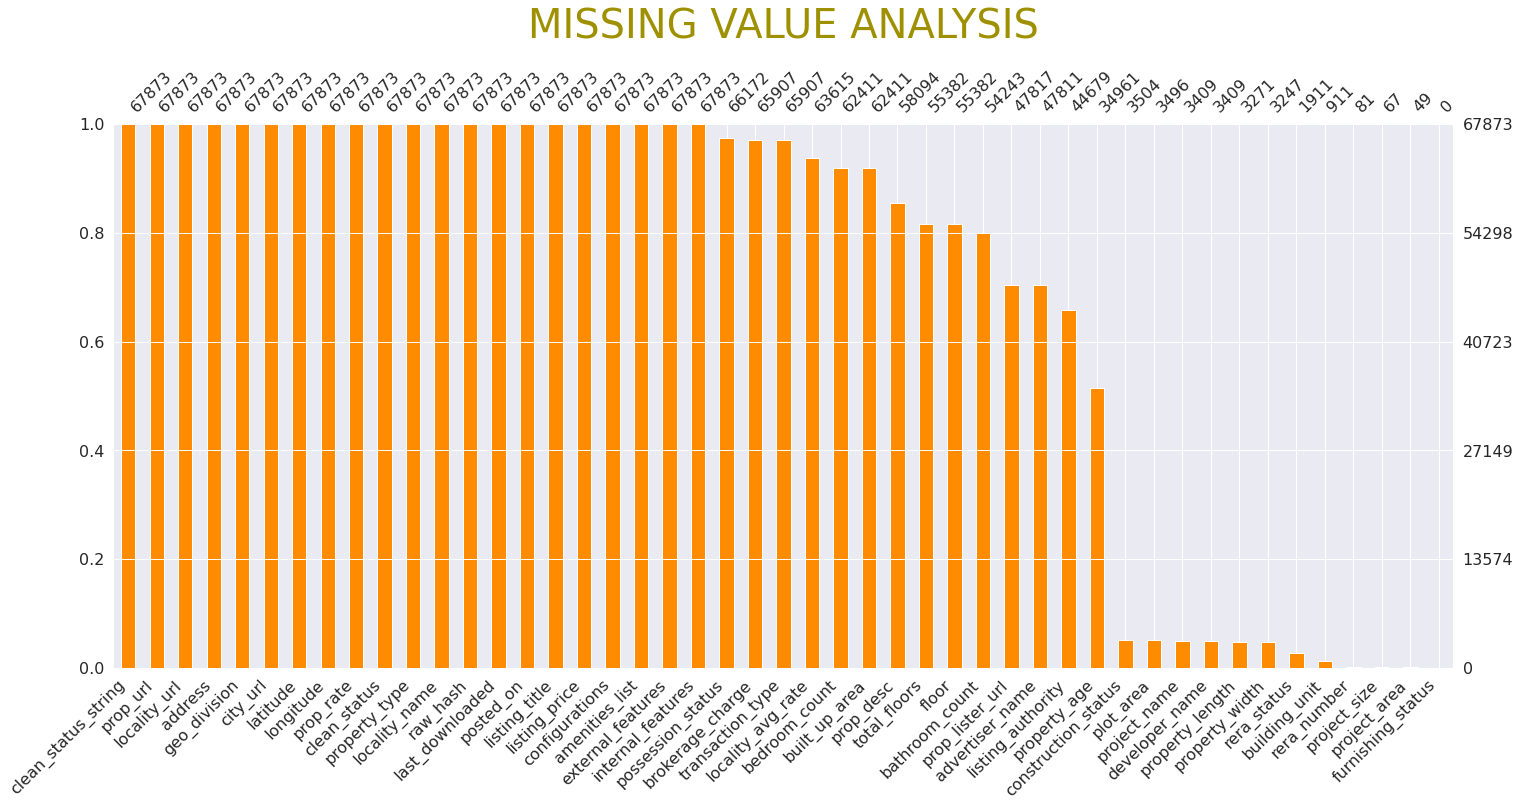

In [ ]:
miss = msno.bar(dfm,n=48, p=0.9, sort='descending', color='darkorange')
miss.set_title("MISSING VALUE ANALYSIS", fontsize=40, pad=30, color='#9f9000')
miss

In [ ]:
dicti = []
for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull())*100,2)
    dicti.append([col,pct_missing])

df_miss = pd.DataFrame(dicti)
df_miss.columns=['Column Name','Missing %']
df_miss = df_miss.sort_values(by='Missing %', ascending=False)
print("\n Missing Value Percentage Table (in descending order) \n")
df_miss


 Missing Value Percentage Table (in descending order) 



Column Name  Missing %
51           clean_hash     100.00
46         scraped_date     100.00
31    furnishing_status     100.00
17        minimum_price      99.95
30          launch_date      99.95
18        maximum_price      99.95
23         project_area      99.93
24         project_size      99.90
44          rera_number      99.88
9         building_unit      98.66
43          rera_status      97.18
26       property_width      95.22
25      property_length      95.18
32       developer_name      94.98
0          project_name      94.98
22            plot_area      94.85
27  construction_status      94.84
8          property_age      48.49
34    listing_authority      34.17
33      advertiser_name      29.56
36      prop_lister_url      29.55
38       bathroom_count      20.08
6                 floor      18.40
7          total_floors      18.40
4             prop_desc      14.41
21        built_up_area       8.05
37        bedroom_count       8.05
20    locality_avg_rate       6.27
29     transaction_type       2.90
35     brokerage_charge       2.90
28    possession_status       2.51
41    internal_features       0.00
45            posted_on       0.00
3              prop_url       0.00
2         listing_price       0.00
50  clean_status_string       0.00
47      last_downloaded       0.00
49         clean_status       0.00
48             raw_hash       0.00
42    external_features       0.00
15             latitude       0.00
40       amenities_list       0.00
39       configurations       0.00
16            longitude       0.00
13         geo_division       0.00
5         property_type       0.00
1         listing_title       0.00
14             city_url       0.00
19            prop_rate       0.00
10        locality_name       0.00
11         locality_url       0.00
12              address       0.00

***Observations:***

***1. Project area and project size have over 99% missing values -- hence drop these features from analysis.***

***2. Project length and project width have over 95% missing values -- hence drop these features from analysis.***

***3. Maximum price and minimum price have over 99% missing values -- hence drop these features from analysis.***

***4. Developer name and project name have the same percentage of missing values -- check for correlation between these two features.***


#### ***Missing value matrix - Developer name vs Project name***

Text(0.5, 1.0, '\n Missing value Pattern  \n')

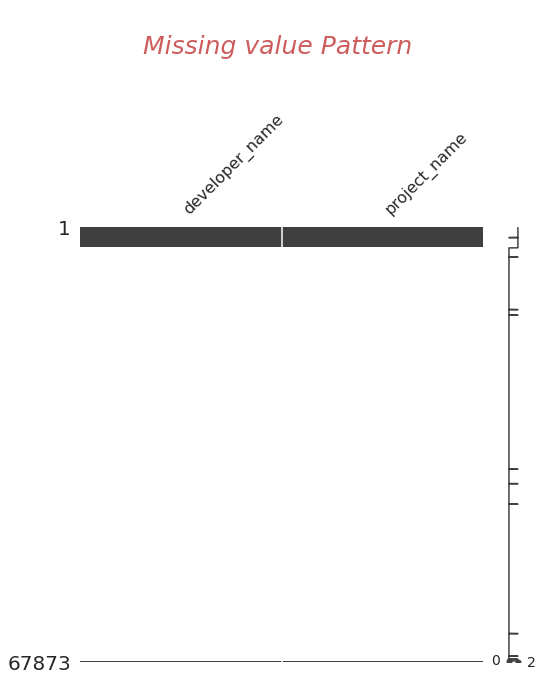

In [115]:
miss_corr = df[['developer_name','project_name']]
msno.matrix(miss_corr,figsize=(8,8) ,p=0.9)
plt.title("\n Missing value Pattern  \n", fontsize=25, pad=30, color='indianred', fontstyle='oblique')

***There seems to be a perfect correlation between the missing values of developer name and project - with only the first few entries of the data having information for both the features.***

#### ***Missing value matrix - bedroom count vs built up area***

Text(0.5, 1.0, '\n Missing value Pattern  \n')

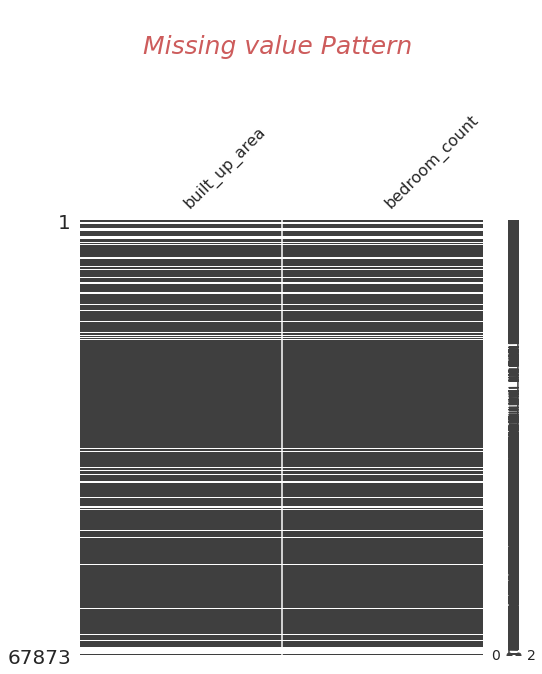

In [116]:
miss_corr = df[['built_up_area','bedroom_count']]
msno.matrix(miss_corr,figsize=(8,8) ,p=0.9)
plt.title("\n Missing value Pattern  \n", fontsize=25, pad=30, color='indianred', fontstyle='oblique')

***The missing values in built up area and bedroom count have perfect correlation as well.***

# ***Univariate Analysis of the features of the dataset (interactive visuals + toggle through 'Show Stats and Insights' bar)***


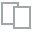
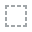
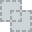
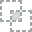
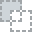
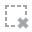
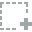
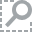
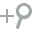
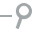
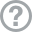
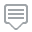
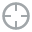
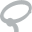
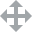
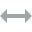
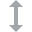
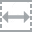
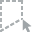
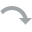
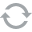
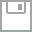
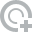
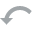
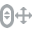
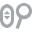
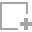
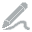
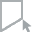
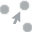
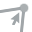
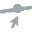

In [ ]:
plot(dfm)

# ***Listing price***

In [ ]:
price_list = df.listing_price.values.tolist()
price_list

['3800000',
 '3500000',
 '19500000',
 '7500000',
 '12000000',
 '80000000',
 '3000000',
 '5800000',
 '5350000',
 '2100000',
 '7500000',
 '139999999',
 '29900000',
 '3711000',
 '22000000',
 '13500000',
 '18500000',
 '8050000',
 '10500000',
 '17000000',
 '4600000',
 '5800000',
 '50000000',
 '4200000',
 '11500000',
 '8500000',
 '6500000',
 '18500000',
 '12800000',
 '1250000',
 '7600000',
 '6500000',
 '11800000',
 '5000000',
 '4210000',
 '1825000',
 '5500000',
 '17500000',
 '5700000',
 '2500000',
 '42500000',
 '4700000',
 '7000000',
 '4000000',
 '3851000',
 '6800000',
 '3400000',
 '25000000',
 '2500000',
 '22500000',
 '5600000',
 '11500000',
 '1451000',
 '50000000',
 '3000000',
 '1951000',
 '3400000',
 '5900000',
 '22500000',
 '7500000',
 '23000000',
 '5800000',
 '2000000',
 '1700000',
 '5651000',
 '3500000',
 '4800000',
 '17500000',
 '6500000',
 '5875000',
 '15900000',
 '5000000',
 '2000000',
 '1600000',
 '15000000',
 '2500000',
 '3600000',
 '22000000',
 '12700000',
 '23500000',
 '3800000'

***We can observe price list having a 'Price on Request' value -- remove such entries to make listing price a numerical column.***

In [ ]:
list_p = df[['listing_price']]
list_p = list_p[(~list_p['listing_price'].isin(['Price on Request']))]

In [ ]:
list_p.shape

(65965, 1)

***After dropping 'Price on Request' we have 65965 entries of price -- 1908 entries were dropped.***

In [ ]:
list_p['listing_price'] = pd.to_numeric(list_p['listing_price'], errors='coerce')
list_p = list_p.dropna()

#### ***Quantile Statistical Breakdown of listing price***

In [ ]:
print("\033[1m" + "Statistical Breakdown of Property Prices in Delhi" + "\033[0m" + "\n")
d = list_p['listing_price'].describe().to_frame()
d

Statistical Breakdown of Property Prices in Delhi



listing_price
count      65,933.00
mean   17,675,362.96
std    44,609,117.69
min             0.00
25%     3,100,000.00
50%     6,500,000.00
75%    16,200,000.00
max   990,000,000.00

**Explore the variance and distribution of the overall listtng price in the dataset through a Boxplot to understand the overall skewness and presence of outliers**

Text(0.5, 1.0, '\nBoxplot of distribution of Property Price in Delhi\n')

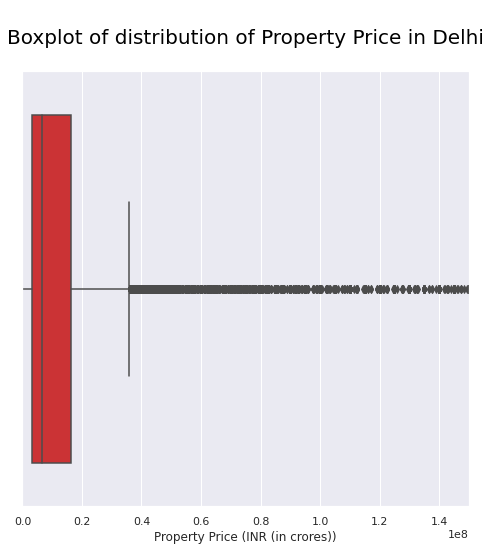

In [ ]:
plt.figure(figsize=(8,8))
j = sns.boxplot(data=list_p, x='listing_price',palette="Set1" )
j.set(xlabel='Property Price (INR (in ten crores))')
j.set(xlim=(0,150000000))
j.set_title("\n" + "Boxplot of distribution of Property Price in Delhi" + "\n", fontsize=20, color='black')

***Further insight into the Listing Price -- toggle between the different chart and statistical options***


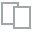
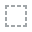
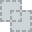
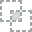
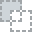
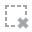
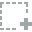
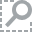
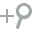
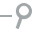
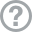
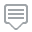
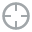
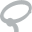
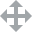
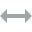
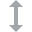
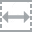
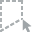
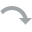
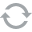
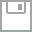
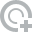
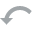
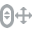
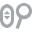
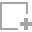
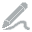
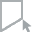
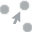
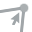
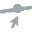

In [ ]:
plot(list_p, 'listing_price')

***Observations from the Property Price distribution Analysis***:

*   *Standard deviation being greater than mean implies the property price in Delhi is **not normally distributed** (p-value 1.2363962604805078e-24)* -- toggling to the **Q-Q plot** in the above visual show's the **Sample quantiles deviated from the theoretical quantiles**. 
*    *A **large variance** indicates that the property prices are far from the mean property price and far from each other*.
*     *Mean is greater than median indicating a **positively skewed distribution** - more prices on the higher end of the price distribution -- skewness score of 10.5763. The longer part of the Interquartile range of the boxplot lies above the median, thus confirming the positive skew.* 

#### ***Cummulative Distribution of listing price***

Text(0.5, 1.0, ' \n Cummulative Distribution of Property Price in Delhi \n')

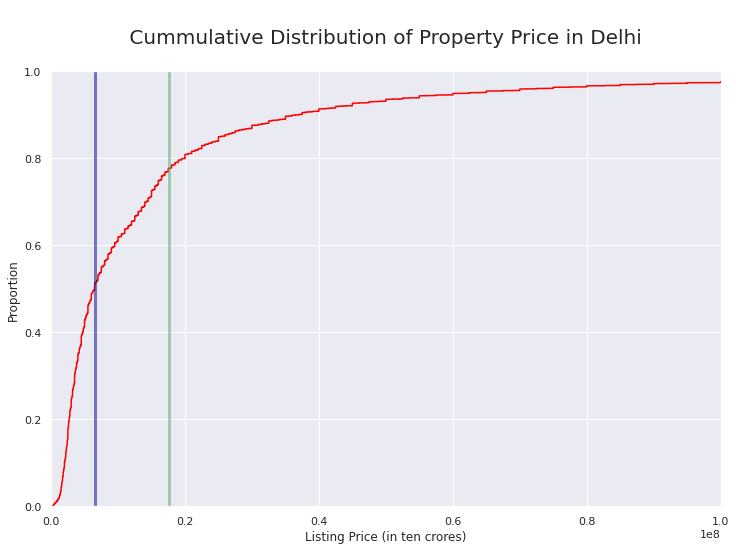

In [ ]:
plt.figure(figsize=(12,8))
sns.ecdfplot(data=list_p, x='listing_price', color='red')
#lll.set(ylim=(0,200000000))

plt.axvline(x=list_p['listing_price'].mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=list_p['listing_price'].median(), linewidth=3, color='darkblue', label="median", alpha=0.5)

plt.xlim(0,100000000)

plt.xlabel('Listing Price (in ten crores)')
plt.title(" \n Cummulative Distribution of Property Price in Delhi \n", fontsize=20)

***Interpretation of cummulative distribution listing prices for properties in Delhi***:

1. Observing the mean (green line) and median lines (blue line) in the ECDF plot shows that **mean is greater than median across the price distribution**. This confirms that the property prices across Delhi are **positively skewed** -- greater frequency of prices on the higher end of the distribution.

#### ***Probability Distribution of Listing Price***

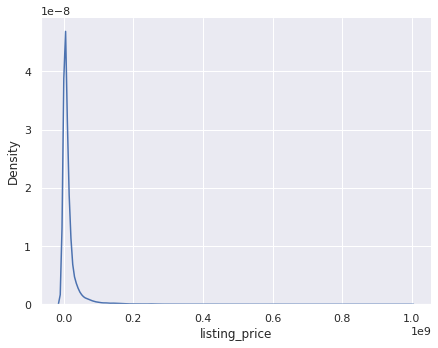

In [ ]:
g = sns.displot(data=list_p,x='listing_price',kind='kde', aspect=15/12)

# ***Maximum and Minimum price***

***From the Missing value analysis section we can gather that maximum and minimum price have 99.95% missing value -- hence, we will not be going forward with analysis for these features.***

# ***Property Age***

In [ ]:
list_p_age = list_p.copy()
list_p_age['property_age'] = df['property_age']
list_p_age['property_age'] =  list_p_age['property_age'].str.replace(r'\D',"")
list_p_age = list_p_age.dropna()
list_p_age['property_age'] = pd.to_numeric(list_p_age['property_age'], errors='coerce')
list_p_age["property_age_cut"] = pd.cut(list_p_age.property_age, [0,5,10,15,20,30,50,75,100])
list_p_age

listing_price  property_age property_age_cut
1       3,500,000.00             5           (0, 5]
2      19,500,000.00             6          (5, 10]
3       7,500,000.00            12         (10, 15]
4      12,000,000.00            70         (50, 75]
6       3,000,000.00             1           (0, 5]
...              ...           ...              ...
67865  12,500,000.00            30         (20, 30]
67866  16,800,000.00            10          (5, 10]
67870   2,800,000.00             1           (0, 5]
67871  17,000,000.00             8          (5, 10]
67872   4,500,000.00             7          (5, 10]

[34961 rows x 3 columns]

#### ***Relationship between property age and property price***

Text(0.5, 1.0, '\nRelationship between property price and property age\n')

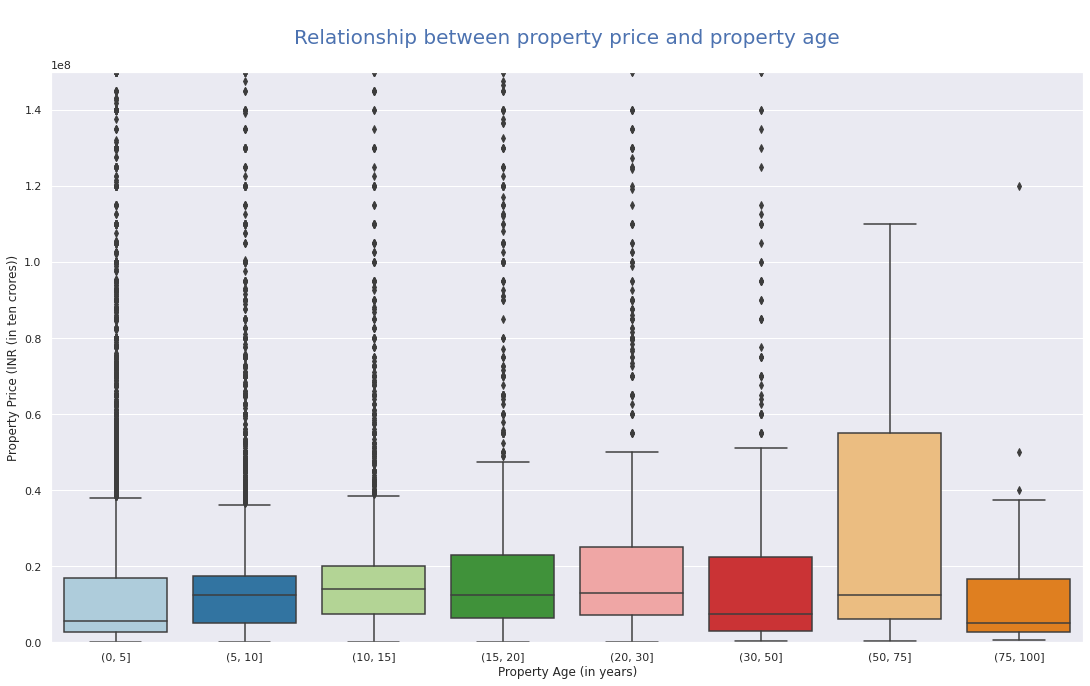

In [ ]:
g = sns.boxplot(x='property_age_cut', y='listing_price', data=list_p_age, palette='Paired')
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,150000000))
g.set_ylabel("Property Price (INR (in ten crores))")
g.set_xlabel("Property Age (in years)")
g.set_title("\n" + "Relationship between property price and property age" + "\n", fontsize=20, color='b')

In [ ]:
a_median = list_p_age.groupby('property_age_cut', as_index=False)['listing_price'].median()
a_median = a_median.sort_values(by='listing_price', ascending=False) 
print("\033[1m" + "Median price - Locality name" + "\033[0m" + "\n")
a_median

Median price - Locality name



property_age_cut  listing_price
2         (10, 15]  14,000,000.00
4         (20, 30]  13,000,000.00
1          (5, 10]  12,500,000.00
3         (15, 20]  12,500,000.00
6         (50, 75]  12,500,000.00
5         (30, 50]   7,500,000.00
0           (0, 5]   5,500,000.00
7        (75, 100]   5,200,000.00

***Observations:***

***1. Properties aged 10-15 years have the highest median price -- followed by properties that are 20-30 years old.***

***2. Properties aged 5-10 years, 15-20 years, 50-75 years have the same median listing price.***

***3. Younger properties (0-5 years) have the second lowest listed median price***

# ***Locality Name***

#### ***Distribution of localities in the listed properties***

In [ ]:
local_group = df.groupby('locality_name', as_index=False)['geo_division'].count() 
local_group.rename(columns = {'geo_division' : 'Total count'}, inplace = True)
local_group = local_group.sort_values(by='Total count', ascending=False)
local_group_20 = local_group.head(20)
print("\033[1m" + "Top 20 Listed localities in Delhi with their count" + "\033[0m" + "\n")
local_group_20

Top 20 Listed localities in Delhi with their count



locality_name  Total count
470        Uttam Nagar         5774
84          Dwarka Mor         4386
371   Sector 24 Rohini         1738
57         Chhattarpur         1454
268      Paschim Vihar         1439
272          Pitampura         1393
48              Burari         1307
413           Shahdara         1020
471        Vasant Kunj          952
372   Sector 25 Rohini          878
103    Greater Kailash          826
104  Greater Kailash I          817
403    Sector 8 Dwarka          816
135        Jamia Nagar          789
197    Mahavir Enclave          741
45            Bindapur          716
398    Sector 6 Dwarka          711
183       Lajpat Nagar          705
101         Govindpuri          671
368  Sector 23 Rohini           638

In [ ]:
fig2 = px.pie(local_group_20, values="Total count", names="locality_name", width=1000, height=900, title='Distribution of Localities in Delhi by Count (Top 20)')
fig2.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig2.show(renderer="colab")

***Uttam Nagar, Dwarka Mor and Sector 24 Rohini have the highes share of the listed properties***.

#### ***Relationship between locality and price***

***Extracting top 10 localities based on distribution***

In [ ]:
df4 = df[(df['locality_name'].isin(['Uttam Nagar','Paschim Vihar', 'Dwarka Mor', 'Pitampura', 'Chhattarpur', 'Burari', 'Shahdara', 'Vasant Kunj', 'Sector 25 Rohini', 'Sector 24 Rohini'])) ]
df4['listing_price'] = list_p['listing_price']

<Figure size 1440x1440 with 0 Axes>

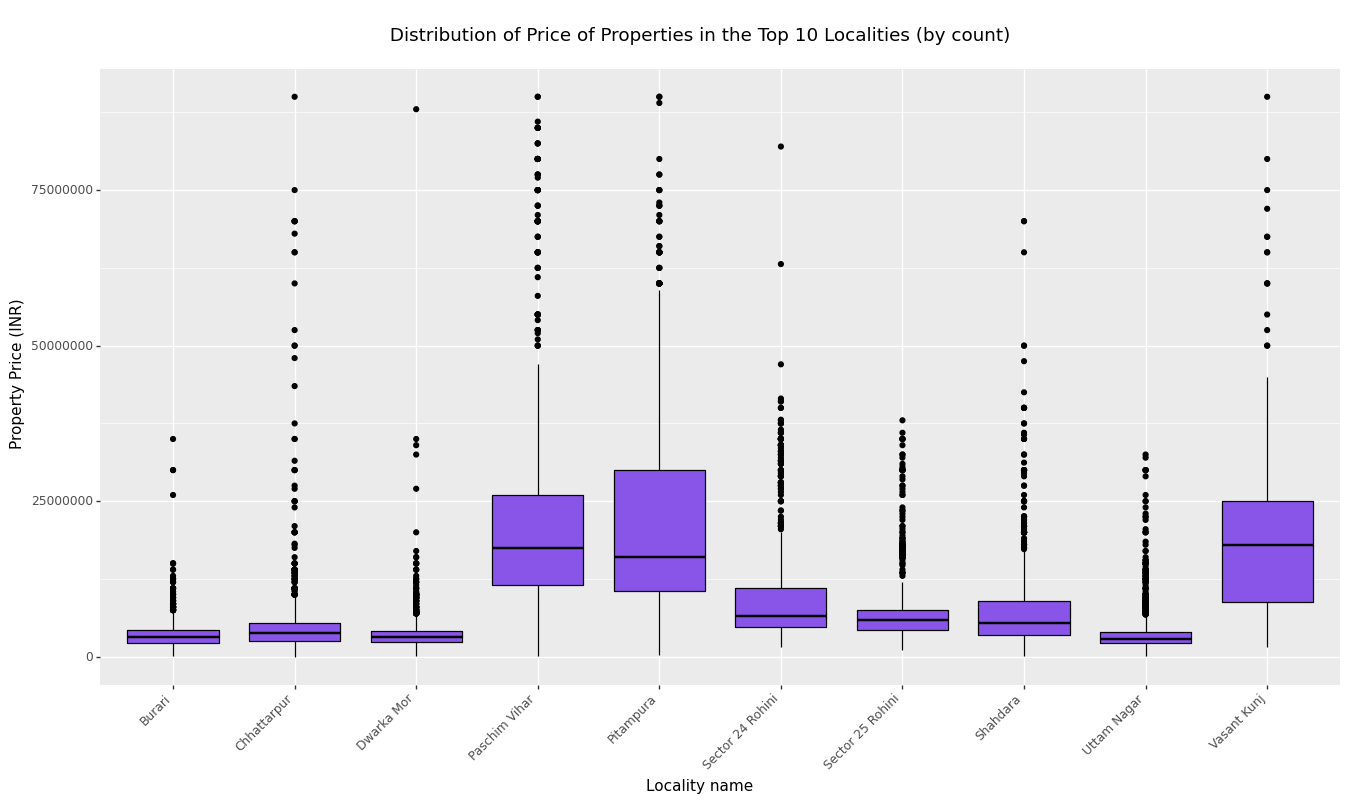

<ggplot: (8728738807877)>

In [ ]:
box3 = ggplot(df4, aes(x = 'locality_name', y='listing_price')) + geom_boxplot(colour="black", fill="#8955e8") + ylim(0,90000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Locality name") + ylab("Property Price (INR)") + ggtitle("\n Distribution of Price of Properties in the Top 10 Localities (by count) \n") 
plt.figure(figsize=(20,20)) 
box3

In [ ]:
l_median = df4.groupby('locality_name', as_index=False)['listing_price'].median()
l_median = l_median.sort_values(by='listing_price', ascending=False) 
print("\033[1m" + "Median price - Locality name" + "\033[0m" + "\n")
l_median

Median price - Locality name



locality_name  listing_price
9       Vasant Kunj  18,500,000.00
3     Paschim Vihar  17,500,000.00
4         Pitampura  17,500,000.00
5  Sector 24 Rohini   6,500,000.00
6  Sector 25 Rohini   5,900,000.00
7          Shahdara   5,500,000.00
1       Chhattarpur   3,900,000.00
0            Burari   3,200,000.00
2        Dwarka Mor   3,106,256.00
8       Uttam Nagar   2,851,000.00

***Observations***:

***1. Properties in Vasant Kunj, Paschim Vihar, and Pitampura have the highest median listing price of the top 10 listed properties by count respectively. Properties in these localities also have a higher variance.***

***2. Properties in Burari, Dwarka Mor, and Uttam Nagar have the lowest median listing price of the top 10 listed properties by count respectively. Properties in these localities also have the least variance.***

# ***Construction Status***

In [ ]:
df['construction_status'].unique()

array([nan, 'Not Started', '2', '1', '3', '4', '403 ft', '30 ft', '13 ft',
       '100 ft', '35 yd', '23 yd', '38 ft', 'Under Construction', '60 ft',
       '5', '18 ft', '₹80,000', '9 ft', '21 ft', '20 ft'], dtype=object)

***Referring to the missing value analysis, 95% of the construction status values are missing -- we will not be taking the analysis for this feature further.***

# ***Transaction Status***

In [ ]:
df['transaction_type'].unique()

array(['Resale', nan], dtype=object)

***The listings have only one transaction type -- 'Resale'.***

# ***Listing Authority***

In [ ]:
df.listing_authority.unique()

array(['Housing Prime Agent', nan, 'Agent', 'Housing Expert', 'Owner',
       'Verified Owner', 'Developer', 'Housing Select Agent',
       'Seller + 1 more', 'Seller'], dtype=object)

In [ ]:
list_p_auth = list_p.copy()
list_p_auth['listing_authority'] = df['listing_authority']
list_p_auth = list_p_auth.dropna()

#### ***Distribution of listing authorities in the listed properties***

In [ ]:
configure_plotly_browser_state()
plt.figure(figsize=(10,10))

dist = df['listing_authority'].value_counts()
#colors = ['mediumturquoise', 'darkorange', 'blue', 'red']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Distribution of listing authorities')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
#fig.show()

<Figure size 720x720 with 0 Axes>

***The listing authority for majority of the listed properties is Agent -- followed by Housing Prime Agent -- and thirdly, Owners.***

***Drop Seller, Seller + 1 more, Housing Select Agent, Developer, Verified Owner. Housing Expert from the price comparison analysis as they each take up less than 0.25% of the share.***

In [ ]:
list_p_auth = list_p_auth[(~list_p_auth['listing_authority'].isin(['Seller']))]
list_p_auth = list_p_auth[(~list_p_auth['listing_authority'].isin(['Seller + 1 more']))]
list_p_auth = list_p_auth[(~list_p_auth['listing_authority'].isin(['Housing Expert']))]
list_p_auth = list_p_auth[(~list_p_auth['listing_authority'].isin(['Housing Select Agent']))]
list_p_auth = list_p_auth[(~list_p_auth['listing_authority'].isin(['Developer']))]
list_p_auth = list_p_auth[(~list_p_auth['listing_authority'].isin(['Verified Owner']))]

#### ***Relationship between listing authority and price***

<Figure size 1440x1440 with 0 Axes>

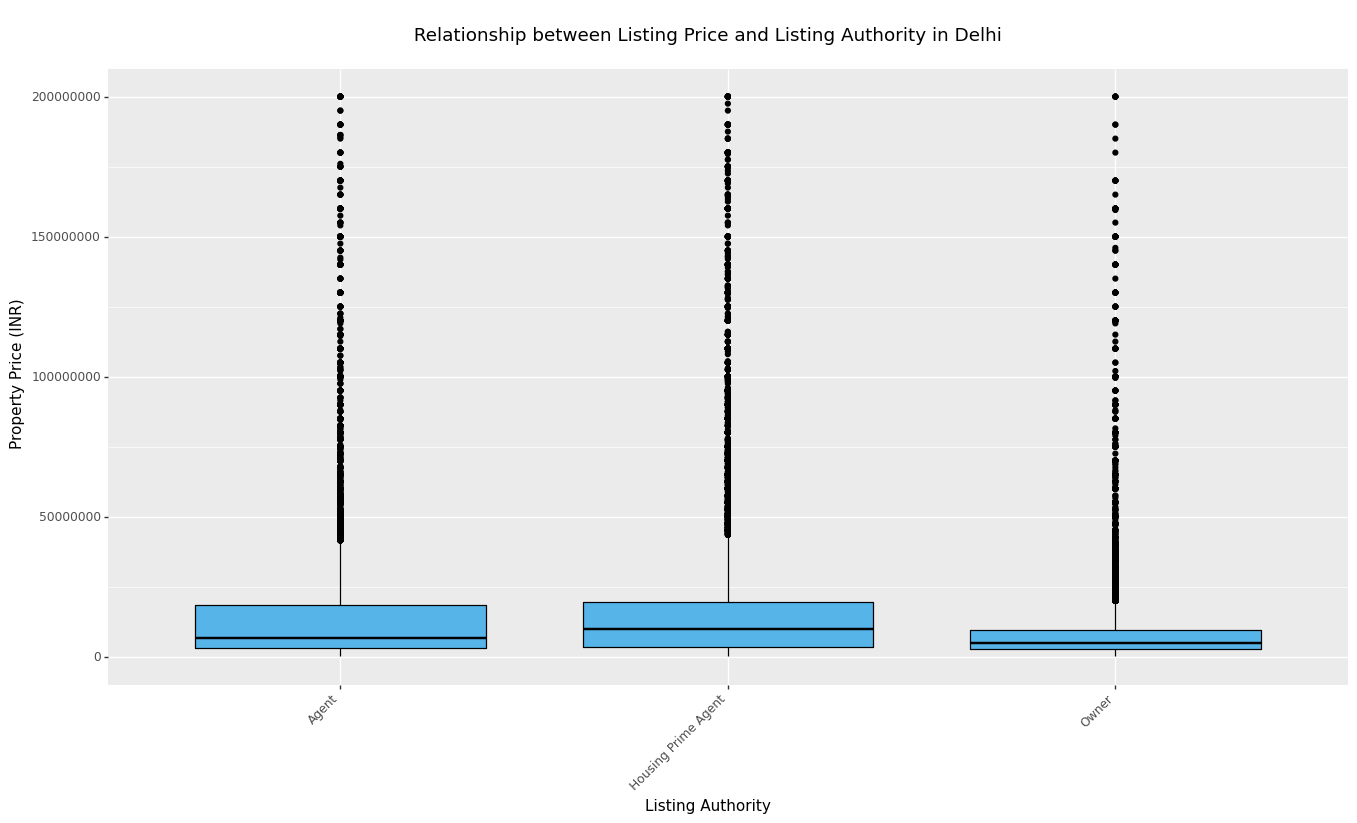

<ggplot: (8728747844189)>

In [ ]:
box5 = ggplot(list_p_auth, aes(x = 'listing_authority', y='listing_price')) + geom_boxplot(colour="black", fill="#56B4E9") + ylim(0,200000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) +  xlab("Listing Authority") + ylab("Property Price (INR)") + ggtitle("\n Relationship between Listing Price and Listing Authority in Delhi \n")


plt.figure(figsize=(20,20)) 
box5

***Properties listed by Housing Prime Agent have the highest median listing price -- followed by Agents -- then Owners***

# ***Property Type***

In [ ]:
df.property_type.unique()

array(['Residential'], dtype=object)

***All the properties are listed as Residential Properties.***

***From the property type column of the dataframe we only get information of the listed properties being residential properties. We further need information on the specific types of properties --> Villa, Apartments, Plots, etc***

***Upon observation, the listing title is the only column that contains any information about the type of property -> we can extract this information from the listing title into a new column***

In [ ]:
prop_type = []
for idx, row in df.iterrows():
  if 'Independent Builder Floor' in row['listing_title']:
    prop_type.append('Independent Builder Floor')
  elif 'Independent House' in row['listing_title']:
    prop_type.append('Independent House')
  elif 'Apartment' in row['listing_title']:
    prop_type.append('Apartment')
  elif 'Residential Plot' in row['listing_title']:
    prop_type.append('Residential Plot')     
  elif 'Villa' in row['listing_title']:
    prop_type.append('Villa')
  else:           
    prop_type.append('Others')

In [ ]:
prop_type_p = df[['listing_title']]
prop_type_p['prop_type'] = prop_type
prop_type_p

listing_title                  prop_type
0      2 BHK Independent Builder Floor for sale in Se...  Independent Builder Floor
1      2 BHK Independent Builder Floor for sale in Sh...  Independent Builder Floor
2      3 BHK Independent Builder Floor for sale in Ch...  Independent Builder Floor
3              2 BHK Independent House for sale in Dabri          Independent House
4      2 BHK Independent House for sale in New Ashok ...          Independent House
...                                                  ...                        ...
67868  3 BHK Independent Builder Floor for sale in Pa...  Independent Builder Floor
67869         3 BHK Apartment for sale in Rajinder Nagar                  Apartment
67870  3 BHK Independent House for sale in Razapur Khurd          Independent House
67871       3 BHK Apartment for sale in Sector 12 Dwarka                  Apartment
67872  2 BHK Independent Builder Floor for sale in Sh...  Independent Builder Floor

[67873 rows x 2 columns]

#### ***Distribution of property type by count***

In [ ]:
prop_count = prop_type_p['prop_type'].value_counts().to_frame('çount').reset_index()
prop_count.columns = ['property_type', 'count']
prop_count

property_type  count
0  Independent Builder Floor  36531
1                  Apartment  20328
2          Independent House   6058
3           Residential Plot   3494
4                     Others    986
5                      Villa    476

In [ ]:
configure_plotly_browser_state()
plt.figure(figsize=(10,10))

dist = prop_type_p['prop_type'].value_counts()
#colors = ['mediumturquoise', 'darkorange', 'blue', 'red']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Distribution of property type')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
#fig.show()

<Figure size 720x720 with 0 Axes>

***Independent Builder Floors, Aparments, and Independent House lead the distribution count of property types in the listed properties.***

#### ***Relationship between listing price and property type***

In [ ]:
prop_type_p['listing_price'] = list_p['listing_price']

<Figure size 1440x1440 with 0 Axes>

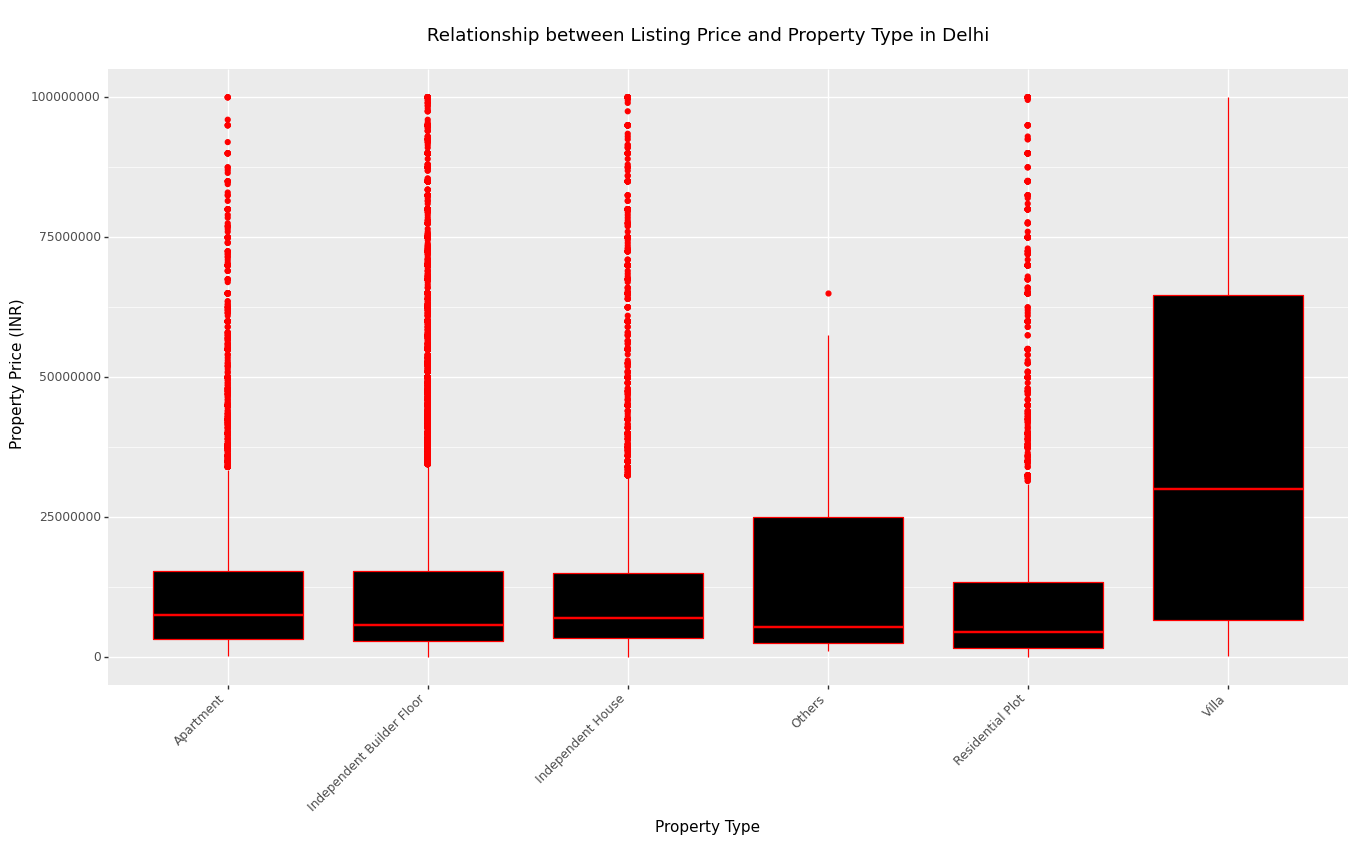

<ggplot: (8728730979781)>

In [ ]:
box1 = ggplot(prop_type_p, aes(x = 'prop_type', y='listing_price')) + geom_boxplot(colour="red", fill="black") + ylim(0,100000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) +  xlab("Property Type") + ylab("Property Price (INR)") + ggtitle("\n Relationship between Listing Price and Property Type in Delhi \n")


plt.figure(figsize=(20,20)) 
box1

In [ ]:
pt_median = prop_type_p.groupby('prop_type', as_index=False)['listing_price'].median()
pt_median = pt_median.sort_values(by='listing_price', ascending=False) 
print("\033[1m" + "Median price - Property Price" + "\033[0m" + "\n")
pt_median

Median price - Property Price



prop_type  listing_price
5                      Villa  65,000,000.00
2          Independent House   8,000,000.00
0                  Apartment   7,500,000.00
1  Independent Builder Floor   6,000,000.00
3                     Others   5,500,000.00
4           Residential Plot   5,000,000.00

***Observation:***

***1. Villa's have the highest property price -- followed by Independent House -- then Apartments. Villa's also have the highest variance in their price distribution.***

#### ***Probability distribution of prices in the top 4 property types (by count)***

In [ ]:
den = prop_type_p.copy()
den = den[(~den['prop_type'].isin(['Others'])) ]

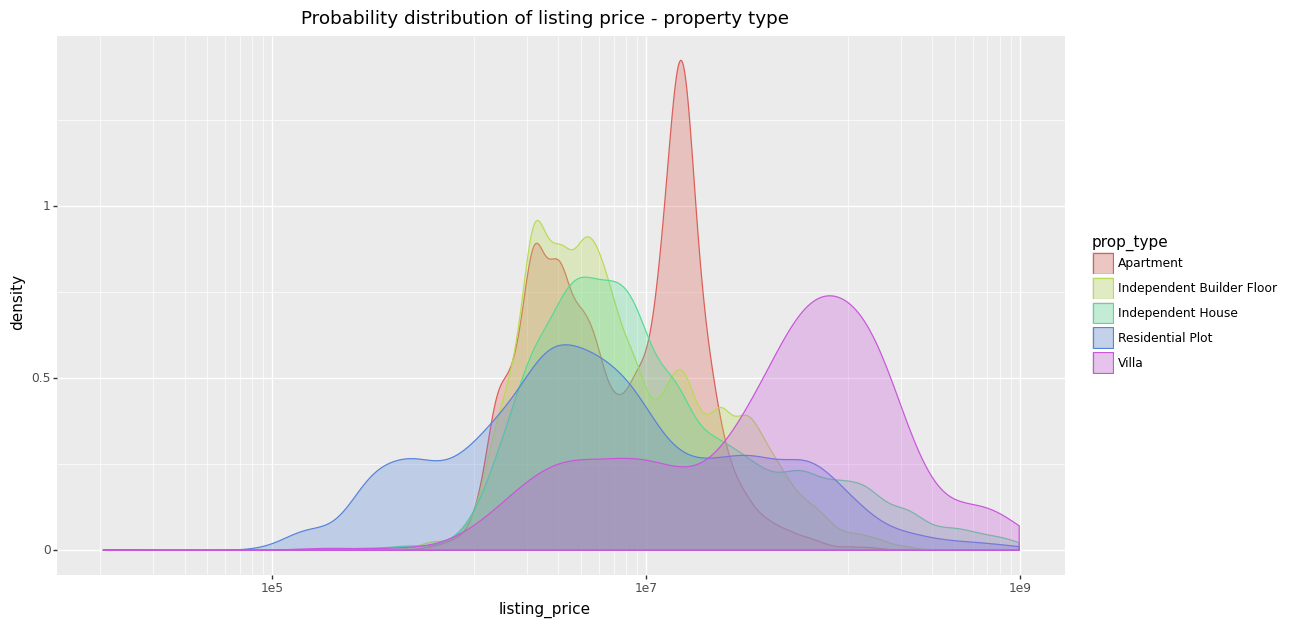

<ggplot: (8728736710313)>

In [ ]:
m = ggplot(den, aes(x='listing_price', color='prop_type', fill='prop_type'))+ geom_density(adjust = 3/4,alpha=0.3) + scale_x_log10() + theme(figure_size=(13, 7)) + ggtitle('Probability distribution of listing price - property type')
m

# ***Bedroom Count***

In [ ]:
df.bedroom_count.unique()

array([ 2.,  3.,  4.,  1., nan,  8.,  9.,  5.,  6., 10.,  7., 11., 15.,
       16.])

#### ***Distribution of bedroom count in properties***

In [ ]:
configure_plotly_browser_state()
plt.figure(figsize=(10,10))

dist = df['bedroom_count'].value_counts()
#colors = ['mediumturquoise', 'darkorange', 'blue', 'red']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
#fig.show()

<Figure size 720x720 with 0 Axes>

***The listed properties have the most share of properties with 3 bedrooms -- followed by 2, 1, and 4 bedroom counts.***

#### ***Relationship between listing price and bedroom count***

In [ ]:
list_p_bed = list_p.copy()
list_p_bed['bedroom_count'] = df['bedroom_count']
list_p_bed['bedroom_count'] = list_p_bed['bedroom_count'].astype(str)
list_p_bed['bedroom_count'] = list_p_bed['bedroom_count'].str.replace('.0','')
list_p_bed = list_p_bed.dropna()

In [ ]:
list_p_bed

listing_price bedroom_count
0       3,800,000.00             2
1       3,500,000.00             2
2      19,500,000.00             3
3       7,500,000.00             2
4      12,000,000.00             2
...              ...           ...
67868  16,200,000.00             3
67869  26,000,000.00             3
67870   2,800,000.00             3
67871  17,000,000.00             3
67872   4,500,000.00             2

[65933 rows x 2 columns]

<Figure size 1080x1080 with 0 Axes>

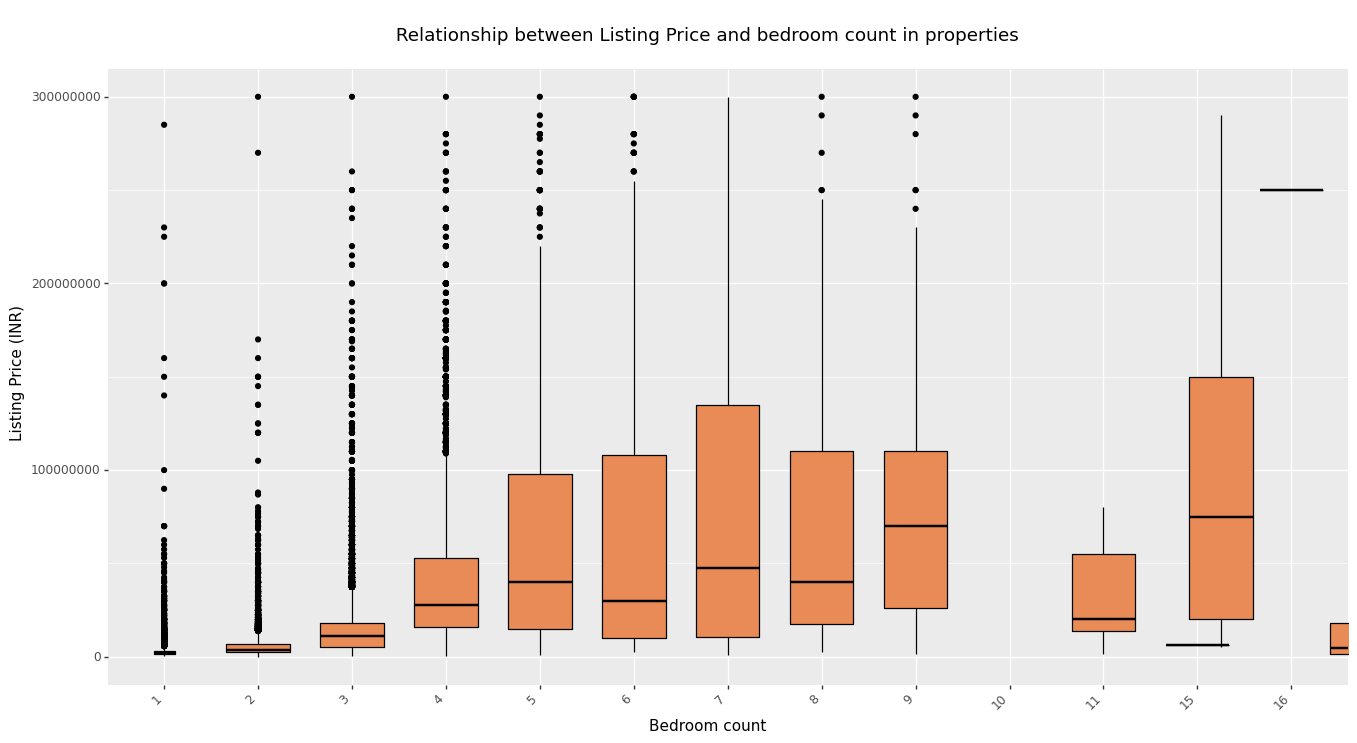

<ggplot: (8728733081281)>

In [ ]:
box9 = ggplot(list_p_bed, aes(x = 'bedroom_count', y='listing_price')) + geom_boxplot(colour="black", fill="#e98b56") + ylim(0,300000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Bedroom Count") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and bedroom count in properties \n") + scale_x_discrete(name="Bedroom count",
                    limits=("1","2","3","4","5","6","7","8","9","10",'11','15','16'))
plt.figure(figsize=(15,15)) 
box9

***There seems to be a clear increase in listing price with the increase in number of bedrooms in a property from bedroom count 1 - 5 - with increasing variance in price distribution as count goes up.***

***After the bedroom counts of 5, there is not a similar clear trend as median prices seem to fluctuate - rise and drop among consecutive counts.***

# ***Bathroom count***

In [ ]:
df.bathroom_count.unique()

array([ 2.,  3.,  1.,  5., nan,  4.,  8.,  9.,  6.,  7., 10., 11.,  0.,
       16., 12., 14., 20., 40., 13.])

#### ***Distribution of bathroom count in properties***

In [ ]:
configure_plotly_browser_state()
plt.figure(figsize=(10,10))

dist = df['bathroom_count'].value_counts()
#colors = ['mediumturquoise', 'darkorange', 'blue', 'red']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
#fig.show()

<Figure size 720x720 with 0 Axes>

***Most of the properties have 2, 3, 1, and 4 bathrooms by count, respectively.***

In [ ]:
list_p_bath = list_p.copy()
list_p_bath['bathroom_count'] = df['bathroom_count']
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].astype(str)
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('.0','')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('11','10+')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('16','10+')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('12','10+')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('14','10+')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('20','10+')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('40','10+')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].str.replace('13','10+')
list_p_bath['bathroom_count'] = list_p_bath['bathroom_count'].dropna()

#### ***Relationship between bathroom count and listing price***

In [ ]:
list_p_bath

listing_price bathroom_count
0       3,800,000.00              2
1       3,500,000.00              2
2      19,500,000.00              3
3       7,500,000.00              1
4      12,000,000.00              5
...              ...            ...
67868  16,200,000.00              3
67869  26,000,000.00            nan
67870   2,800,000.00              3
67871  17,000,000.00              2
67872   4,500,000.00              1

[65933 rows x 2 columns]

<Figure size 1080x1080 with 0 Axes>

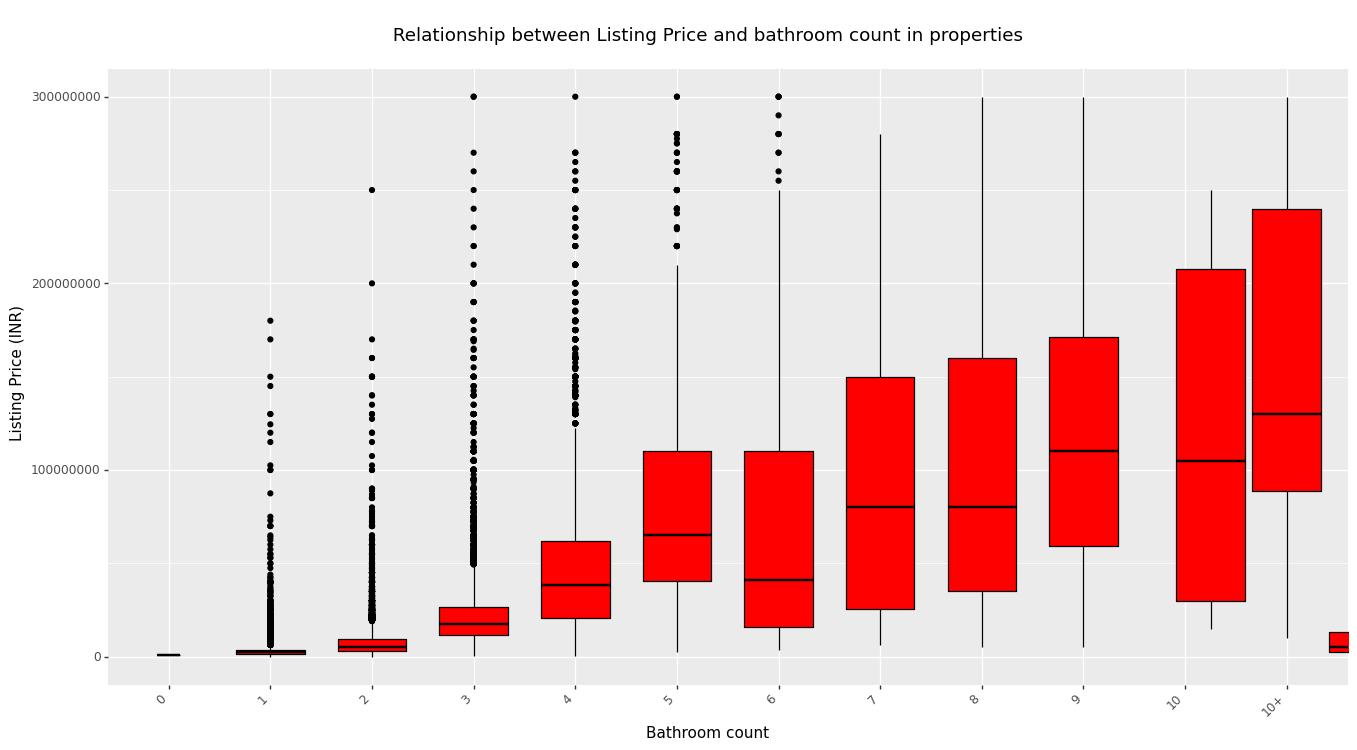

<ggplot: (8728733079725)>

In [ ]:
box10 = ggplot(list_p_bath, aes(x = 'bathroom_count', y='listing_price')) + geom_boxplot(colour="black", fill="red") + ylim(0,300000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Bathroom Count") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and bathroom count in properties \n") + scale_x_discrete(name="Bathroom count",
                    limits=('0',"1","2","3","4","5","6","7","8","9","10",'10+'))
plt.figure(figsize=(15,15)) 
box10

***There seems to be a very clear trend of increased in listing price with increase in number of bathrooms in a property, except for one anomaly -- a sudden drop of price at bathroom count 6.***

# ***Furnished Status***

***The dataset does not explicitly have a column that specifies the furnished status of the properties -- this information has to be extracted from the internal features.***

In [ ]:
furn_type = []
for idx, row in df.iterrows():
  if 'Semi Furnished' in row['internal_features']:
    furn_type.append('Semi Furnished')
  elif 'Unfurnished' in row['internal_features']:
    furn_type.append('Unfurnished')
  elif 'Furnished' in row['internal_features']:
    furn_type.append('Furnished')
  else:           
    furn_type.append('Óthers')

In [ ]:
furn_type_p = df[['internal_features']]
furn_type_p['furn_type'] = furn_type
furn_type_p[1:50]

internal_features       furn_type
1           [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
2              [{"furnishing_status": "Unfurnished"}]     Unfurnished
3              [{"furnishing_status": "Unfurnished"}]     Unfurnished
4           [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
5           [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
6              [{"furnishing_status": "Unfurnished"}]     Unfurnished
7           [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
8   [{"furnishing_status": "Unfurnished"}, {"power...     Unfurnished
9   [{"furnishing_status": "Unfurnished"}, {"power...     Unfurnished
10             [{"furnishing_status": "Unfurnished"}]     Unfurnished
11          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
12             [{"furnishing_status": "Unfurnished"}]     Unfurnished
13          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
14          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
15         [{"furnishing_status": "Fully Furnished"}]       Furnished
16             [{"furnishing_status": "Unfurnished"}]     Unfurnished
17          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
18          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
19          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
20             [{"furnishing_status": "Unfurnished"}]     Unfurnished
21          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
22          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
23          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
24          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
25          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
26                                                 []          Óthers
27          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
28          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
29             [{"furnishing_status": "Unfurnished"}]     Unfurnished
30         [{"furnishing_status": "Fully Furnished"}]       Furnished
31             [{"furnishing_status": "Unfurnished"}]     Unfurnished
32          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
33          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
34          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
35          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
36          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
37          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
38          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
39         [{"furnishing_status": "Fully Furnished"}]       Furnished
40          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
41          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
42         [{"furnishing_status": "Fully Furnished"}]       Furnished
43             [{"furnishing_status": "Unfurnished"}]     Unfurnished
44          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
45          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
46          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
47          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
48          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished
49          [{"furnishing_status": "Semi Furnished"}]  Semi Furnished

#### ***Distribution of Furnished Type in properties***

In [ ]:
furn_count = furn_type_p['furn_type'].value_counts().to_frame('çount').reset_index()
furn_count.columns = ['furn_type', 'count']
furn_count

furn_type  count
0  Semi Furnished  43667
1     Unfurnished   9398
2          Óthers   8969
3       Furnished   5839

In [ ]:
configure_plotly_browser_state()
plt.figure(figsize=(10,10))

dist = furn_type_p['furn_type'].value_counts()
#colors = ['mediumturquoise', 'darkorange', 'blue', 'red']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Distribution of furnished status')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
#fig.show()

<Figure size 720x720 with 0 Axes>

***Semi-furnished properties take up 64% of the listed properties -- followed by Unfurnished properties at 13.8%.***

#### ***Relationship between Furnished Type and price***

In [ ]:
furn_type_p['listing_price'] = list_p['listing_price']
furn_type_p = furn_type_p.dropna()

In [ ]:
furn_type_p

internal_features       furn_type  listing_price
0      [{"furnishing_status": "Semi Furnished"}]  Semi Furnished   3,800,000.00
1      [{"furnishing_status": "Semi Furnished"}]  Semi Furnished   3,500,000.00
2         [{"furnishing_status": "Unfurnished"}]     Unfurnished  19,500,000.00
3         [{"furnishing_status": "Unfurnished"}]     Unfurnished   7,500,000.00
4      [{"furnishing_status": "Semi Furnished"}]  Semi Furnished  12,000,000.00
...                                          ...             ...            ...
67868  [{"furnishing_status": "Semi Furnished"}]  Semi Furnished  16,200,000.00
67869                                         []          Óthers  26,000,000.00
67870     [{"furnishing_status": "Unfurnished"}]     Unfurnished   2,800,000.00
67871  [{"furnishing_status": "Semi Furnished"}]  Semi Furnished  17,000,000.00
67872  [{"furnishing_status": "Semi Furnished"}]  Semi Furnished   4,500,000.00

[65933 rows x 3 columns]

<Figure size 1080x1080 with 0 Axes>

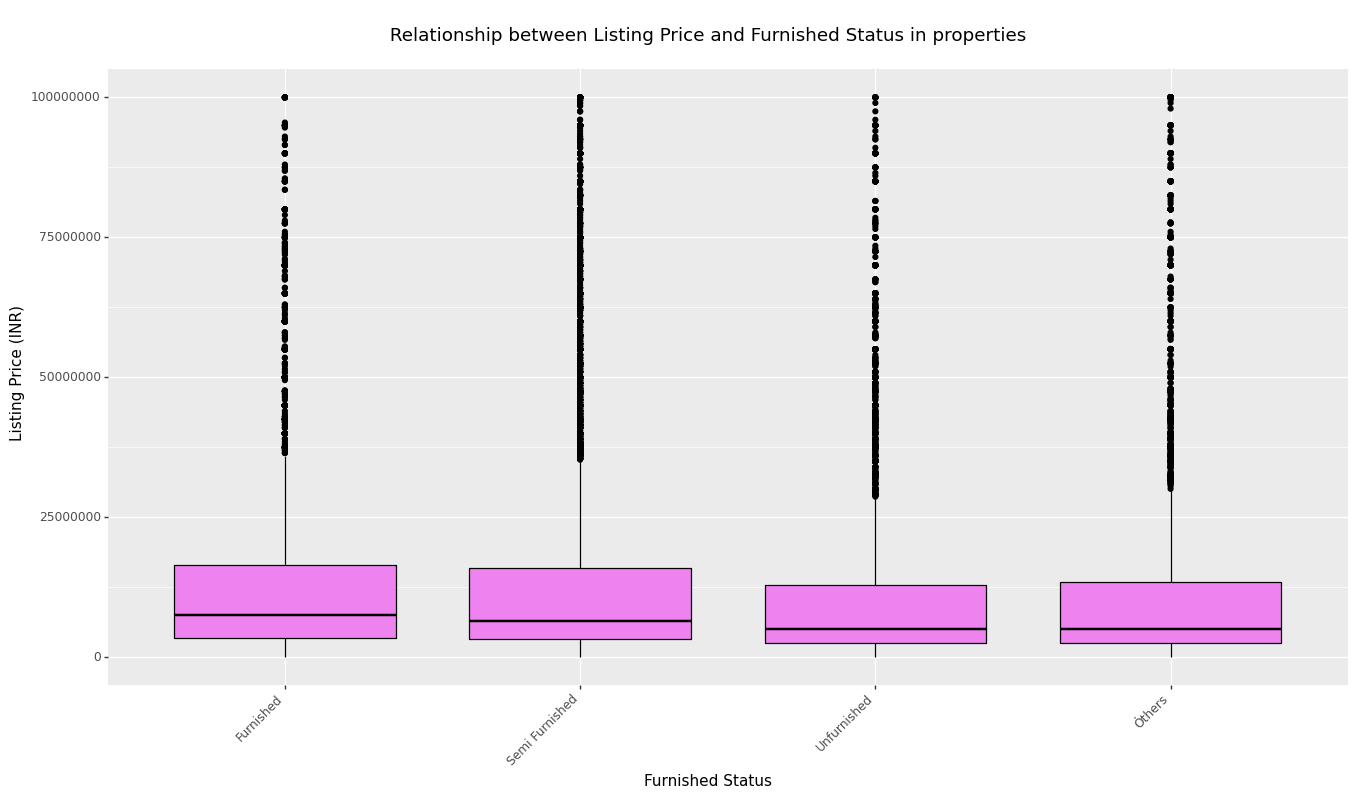

<ggplot: (8728730973037)>

In [ ]:
box9 = ggplot(furn_type_p, aes(x = 'furn_type', y='listing_price')) + geom_boxplot(colour="black", fill="violet") + ylim(0,100000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Furnished Status") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Furnished Status in properties \n") 
plt.figure(figsize=(15,15)) 
box9

***Further look at median prices closely as they seem close to each other.***

In [ ]:
f_median = furn_type_p.groupby('furn_type', as_index=False)['listing_price'].median()
f_median = f_median.sort_values(by='listing_price', ascending=False) 
print("\033[1m" + "Median price - Locality name" + "\033[0m" + "\n")
f_median

Median price - Locality name



furn_type  listing_price
0       Furnished   7,900,000.00
1  Semi Furnished   6,500,000.00
2     Unfurnished   5,500,000.00
3          Óthers   5,500,000.00

***Observation***:

***Furnished properties have the highest median price -- followed by semi-furnished properties -- and then unfurnished properties.***

# ***Floor of property***

#### ***Distribution of floors***

In [ ]:
flooring = df['floor'].value_counts().to_frame('çount').reset_index()
flooring.columns = ['floor', 'count']
#flooring

flooring_filtered = flooring[flooring['count'] > 200]
flooring_filtered

floor  count
0   Between Ground to 1st Floor  21851
1      Between 1st to 2nd Floor  13508
2      Between 2nd to 4th Floor   8876
3      Between 2nd to 3rd Floor   2513
4   Between Ground to 2nd Floor   1223
5      Between 1st to 3rd Floor   1145
6      Between 3rd to 6th Floor    934
7   Between Ground to 3rd Floor    866
8      Between 0th to 1st Floor    657
9      Between 2nd to 5th Floor    654
10    Between 6th to 10th Floor    536
11     Between 3rd to 5th Floor    536
12     Between 4th to 7th Floor    376
13     Between 5th to 8th Floor    305
14  Between Ground to 0th Floor    276

In [ ]:
floor_list = flooring_filtered["floor"].values.tolist()
flooring2 = df[['floor']]
flooring2 = flooring2[(flooring2['floor'].isin(floor_list)) ]

In [ ]:
configure_plotly_browser_state()
plt.figure(figsize=(10,10))

dist = flooring2['floor'].value_counts()
#colors = ['mediumturquoise', 'darkorange', 'blue', 'red']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
#fig.show()

<Figure size 720x720 with 0 Axes>

***A majority of the listed properties are between ground and fourth floor.***

#### ***Relationship between floor and price***

In [ ]:
flooring2['listing_price'] = list_p['listing_price']
flooring2 = flooring2.dropna()

<Figure size 1080x1080 with 0 Axes>

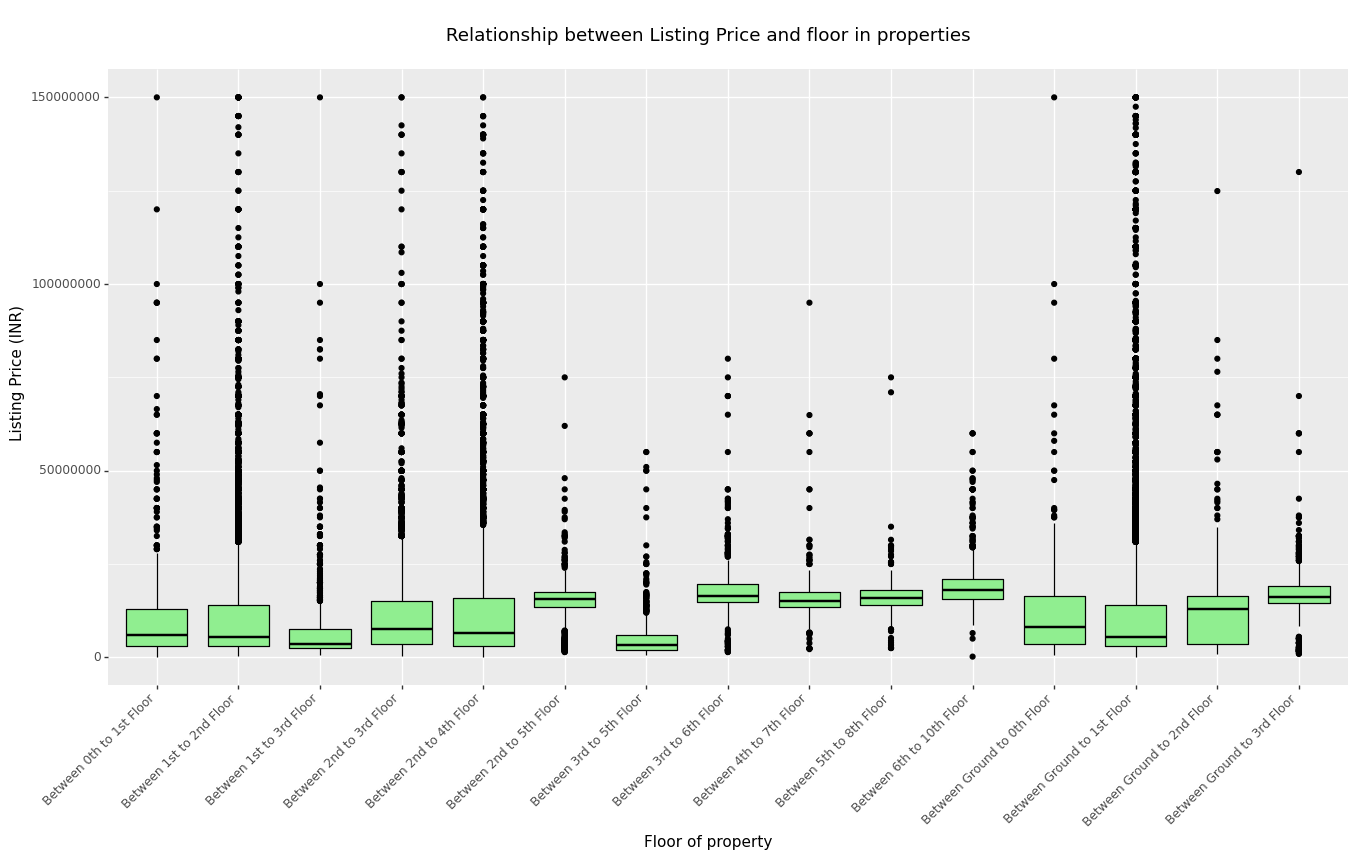

<ggplot: (8728730520525)>

In [ ]:
box10 = ggplot(flooring2, aes(x = 'floor', y='listing_price')) + geom_boxplot(colour="black", fill="lightgreen") + ylim(0,150000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Floor of property") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and floor in properties \n") 
plt.figure(figsize=(15,15)) 
box10

# ***Total floors***

In [ ]:
list_p_floor = list_p.copy()
list_p_floor['total_floors'] = df.total_floors
list_p_floor = list_p_floor.dropna()
list_p_floor['total_floors'].unique()

array([ 3.,  4.,  5., 10.,  8.,  2., 12.,  6.,  7.,  9., 41., 14.,  1.,
       16., 99., 15., 44., 18., 21., 30., 32., 24., 27., 11., 17., 66.,
       40., 13., 19., 33., 43., 28., 20., 29., 25., 26., 31., 39., 22.,
       70., 47.,  0., 23., 35., 54., 57., 80., 45.])

#### ***Relationship between total floors and property type***

Text(0.5, 1.0, '\nRegression plot of Property Price vs total floors in property - lowess model fit line\n')

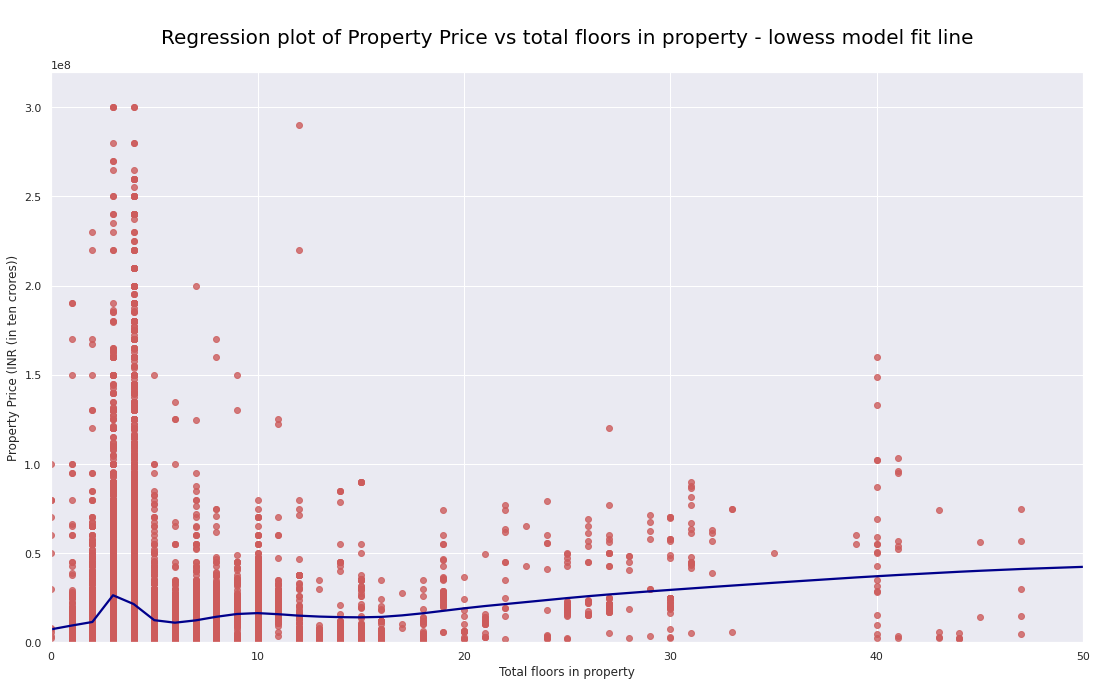

In [ ]:
g = sns.regplot(x='total_floors', y='listing_price', data=list_p_floor, color='indianred', scatter_kws={'alpha':0.8}, line_kws={'color': 'darkblue'}, lowess=True)
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,320000000))
g.set(xlim=(0,50))
g.set_ylabel("Property Price (INR (in ten crores))")
g.set_xlabel("Total floors in property")
g.set_title("\n" + "Regression plot of Property Price vs total floors in property - lowess model fit line" + "\n", fontsize=20, color='black')

**Relationship between total floors in a property and listing price**:

***There seems to be a fairly linear trend once the property is over 15 floors. Until that, there is a quadratic relationship between listing price and total floors***.

***Extreme variances can be observed for property with total floors of 0-5.***

# ***Built up area***

In [131]:
list_p_area = list_p.copy()
list_p_area['built_up_area'] = df['built_up_area']
list_p_area

listing_price built_up_area
0       3,800,000.00     550 sq.ft
1       3,500,000.00     500 sq.ft
2      19,500,000.00    1250 sq.ft
3       7,500,000.00     450 sq.ft
4      12,000,000.00    3250 sq.ft
...              ...           ...
67868  16,200,000.00    1150 sq.ft
67869  26,000,000.00    1250 sq.ft
67870   2,800,000.00    1000 sq.ft
67871  17,000,000.00    1800 sq.ft
67872   4,500,000.00     880 sq.ft

[65933 rows x 2 columns]

***Check for metric anomalies***

In [132]:
list_p_area['metric']=list_p_area['built_up_area'].str.extract('([a-z]+[.!-]+[a-z]+)', expand=False)
list_p_area = list_p_area.dropna()
list_p_area['metric'].unique()
#list_p_area
#'([a-z]+[.!-]+[a-z]+)'

array(['sq.ft', 'sq.yd'], dtype=object)

In [133]:
list_p_area['built_up_area'] =  list_p_area['built_up_area'].str.replace(r'\D',"") #replacing all non digits with empty string

list_p_area['built_up_area'] = pd.to_numeric(list_p_area['built_up_area'], errors='coerce')
list_p_area[10:60]

listing_price  built_up_area metric
10   7,500,000.00            800  sq.ft
11 139,999,999.00           4950  sq.ft
12  29,900,000.00           1800  sq.ft
13   3,711,000.00            950  sq.ft
14  22,000,000.00           2100  sq.ft
15  13,500,000.00           1125  sq.ft
16  18,500,000.00           1600  sq.ft
17   8,050,000.00           1300  sq.ft
18  10,500,000.00           1230  sq.ft
19  17,000,000.00           1700  sq.ft
20   4,600,000.00            450  sq.ft
21   5,800,000.00           1350  sq.ft
22  50,000,000.00           2475  sq.ft
23   4,200,000.00            500  sq.ft
24  11,500,000.00           1100  sq.ft
25   8,500,000.00            650  sq.ft
27  18,500,000.00           2300  sq.ft
28  12,800,000.00           1000  sq.ft
29   1,250,000.00            271  sq.ft
30   7,600,000.00           1150  sq.ft
31   6,500,000.00            800  sq.ft
32  11,800,000.00           1200  sq.ft
33   5,000,000.00           1080  sq.ft
34   4,210,000.00            750  sq.ft
35   1,825,000.00            600  sq.ft
36   5,500,000.00           1012  sq.ft
37  17,500,000.00           1720  sq.ft
38   5,700,000.00           1080  sq.ft
39   2,500,000.00            900  sq.ft
40  42,500,000.00           1900  sq.ft
41   4,700,000.00            925  sq.ft
42   7,000,000.00           2136  sq.ft
43   4,000,000.00            675  sq.ft
44   3,851,000.00            850  sq.ft
45   6,800,000.00            750  sq.ft
46   3,400,000.00            550  sq.ft
47  25,000,000.00           1600  sq.ft
48   2,500,000.00            600  sq.ft
49  22,500,000.00           1800  sq.ft
51  11,500,000.00           1200  sq.ft
52   1,451,000.00            410  sq.ft
53  50,000,000.00           1462  sq.ft
54   3,000,000.00            400  sq.ft
55   1,951,000.00            480  sq.ft
58  22,500,000.00           1600  sq.ft
59   7,500,000.00            800  sq.ft
60  23,000,000.00           1250  sq.ft
61   5,800,000.00            800  sq.ft
62   2,000,000.00            550  sq.ft
63   1,700,000.00            720  sq.ft

In [134]:
list_p_area.dtypes

listing_price    float64
built_up_area      int64
metric            object
dtype: object

***Built up area is listed in both square feet and square yard -- convert all values to a common metric - square feet***

In [135]:
vals = {'sq.ft': 1,
    'sq.yd': 9}

list_p_area['area_ft'] = list_p_area['built_up_area']*(list_p_area['metric'].map(vals))
list_p_area

listing_price  built_up_area metric  area_ft
0       3,800,000.00            550  sq.ft      550
1       3,500,000.00            500  sq.ft      500
2      19,500,000.00           1250  sq.ft     1250
3       7,500,000.00            450  sq.ft      450
4      12,000,000.00           3250  sq.ft     3250
...              ...            ...    ...      ...
67868  16,200,000.00           1150  sq.ft     1150
67869  26,000,000.00           1250  sq.ft     1250
67870   2,800,000.00           1000  sq.ft     1000
67871  17,000,000.00           1800  sq.ft     1800
67872   4,500,000.00            880  sq.ft      880

[62411 rows x 4 columns]

***With all the values in the super area having the same metric units (square feet), a graphical analysis to find the correlation between listing price and super area can be performed***

#### ***Relationship between built up area and price***

In [136]:
area_price = list_p_area[['area_ft','listing_price']]

Text(0.5, 1.0, '\nRelationship between Property Price vs Built up area - lowess fit model line\n')

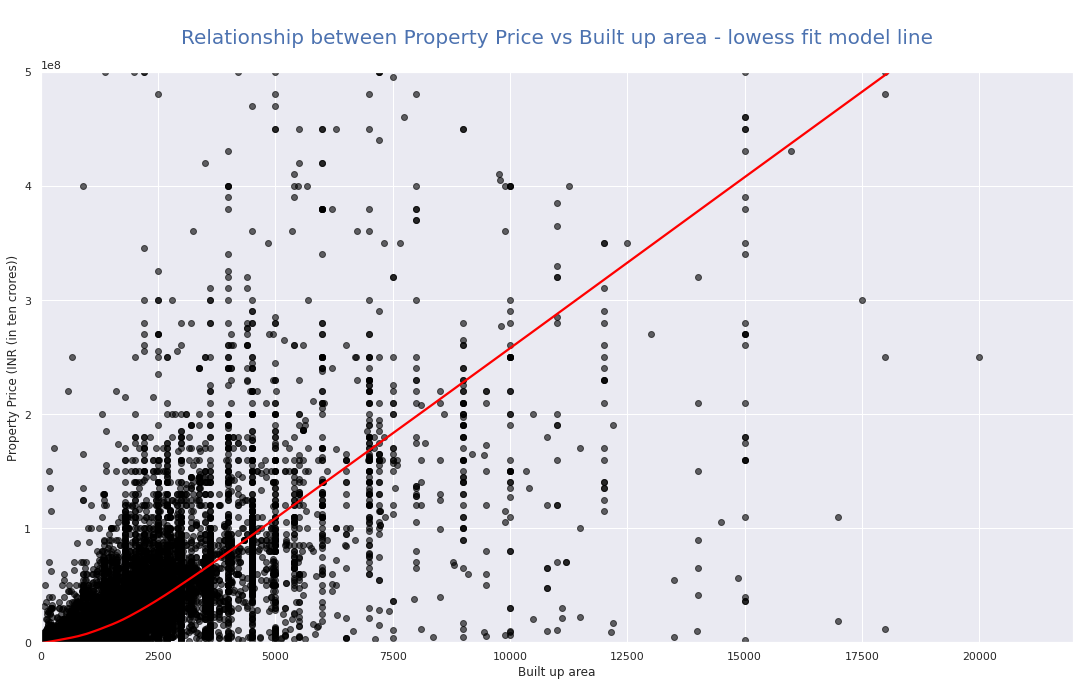

In [140]:
g = sns.regplot(x='area_ft', y='listing_price', data=list_p_area, color='black', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'}, lowess=True)
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,500000000))
g.set(xlim=(0,22000))
g.set_ylabel("Property Price (INR (in ten crores))")
g.set_xlabel("Built up area")
g.set_title("\n" + "Relationship between Property Price vs Built up area - lowess fit model line" + "\n", fontsize=20, color='b')

***Observations - relationship between built up area and property price:***

***There seems to be a slightly quadratic relationship in the built up area range of 0-3000 sq.ft, followed by an almost linear trend.***

***Try plotting without price outliers (< 35700000)***

In [141]:
no_out = area_price.copy()

filter = no_out['listing_price'] < 35700000
no_out = no_out.where(filter)

Text(0.5, 1.0, '\nLowess Model fit line of Property Price vs Super built up area (dropping outliers)\n')

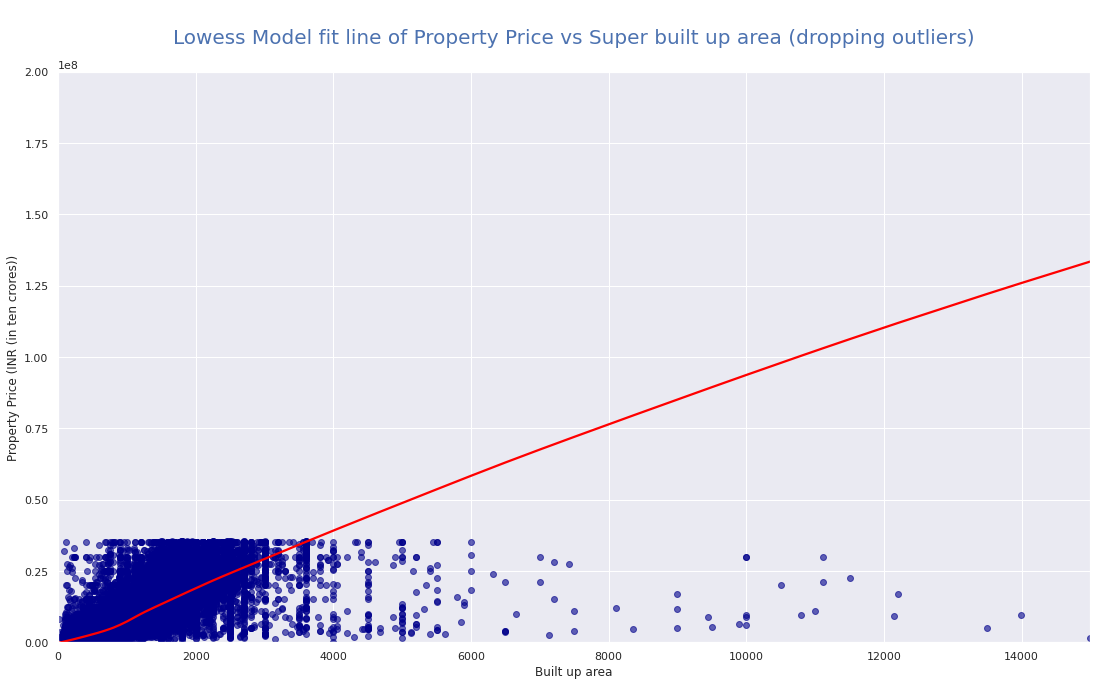

In [142]:
g = sns.regplot(x='area_ft', y='listing_price', data=no_out, color='darkblue', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'},lowess=True)
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,200000000))
g.set(xlim=(0,15000))
g.set_ylabel("Property Price (INR (in ten crores))")
g.set_xlabel("Built up area")
g.set_title("\n" + "Lowess Model fit line of Property Price vs Super built up area (dropping outliers)" + "\n", fontsize=20, color='b')

***Observation***:

***Without the price outliers, the linear trend between built up area and property price is more apparent.***

# ***Property rate***

In [ ]:
prop_rate = df[['prop_rate']]
prop_rate['metrics'] = prop_rate['prop_rate'].str.extract('(\D+[a-z]+)', expand=False)

In [ ]:
prop_rate

prop_rate   metrics
0       6.91 K/sq.ft   K/sq.ft
1       7.00 K/sq.ft   K/sq.ft
2      15.60 K/sq.ft   K/sq.ft
3      16.67 K/sq.ft   K/sq.ft
4       3.69 K/sq.ft   K/sq.ft
...              ...       ...
67868  14.09 K/sq.ft   K/sq.ft
67869  20.80 K/sq.ft   K/sq.ft
67870   2.80 K/sq.ft   K/sq.ft
67871   9.44 K/sq.ft   K/sq.ft
67872   5.11 K/sq.ft   K/sq.ft

[67873 rows x 2 columns]

In [ ]:
prop_rate['metrics'].unique()

array([' K/sq.ft', 'Price on request', '/sq.ft', ' Lacs/sq.ft',
       ' Lacs/sq.mt', ' Lacs/sq.yd', ' K/sq.mt', ' K/sq.yd', '/sq.yd',
       ' Lac/sq.yd', ' Lac/sq.ft', ' Lac/sq.mt', '/sq.mt'], dtype=object)

***Property rate has 12 different metrics which have to be trasformed to a uniform metric.***

In [ ]:
prop_ratep = prop_rate.loc[prop_rate['metrics'] == '/sq.ft']
prop_ratep

prop_rate metrics
114    368/sq.ft  /sq.ft
191    416/sq.ft  /sq.ft
261    611/sq.ft  /sq.ft
324    106/sq.ft  /sq.ft
431    333/sq.ft  /sq.ft
...          ...     ...
66121  555/sq.ft  /sq.ft
66173  277/sq.ft  /sq.ft
66339  666/sq.ft  /sq.ft
66515  944/sq.ft  /sq.ft
66620  333/sq.ft  /sq.ft

[306 rows x 2 columns]

***Drop metrics '/sq.ft', 'sq.mt' and '/sq.yd' because they are incomplete -- there is no information if the values are in thousands or Lacs.***

In [ ]:
prop_rate = prop_rate[(~prop_rate['metrics'].isin(['Price on request','/sq.ft','/sq.mt','/sq.yd']))]
prop_rate['metrics'] = prop_rate['metrics'].str.strip()
prop_rate['prop_rate'] = prop_rate['prop_rate'].str.replace(r'\D',"")
prop_rate['prop_rate'] = pd.to_numeric(prop_rate['prop_rate'], errors='coerce')
prop_rate.metrics.unique()

array(['K/sq.ft', 'Lacs/sq.ft', 'Lacs/sq.mt', 'Lacs/sq.yd', 'K/sq.mt',
       'K/sq.yd', 'Lac/sq.yd', 'Lac/sq.ft', 'Lac/sq.mt'], dtype=object)

In [ ]:
vals = {'K/sq.ft': 10/1,
       'K/sq.yd':10/9,
       'K/sq.mt': 10/10.76,
   'Lacs/sq.ft': 1000/1,
   'Lac/sq.ft': 1000/1,
   'Lacs/sq.mt': 1000/10.76,
   'Lac/sq.mt': 1000/10.76,
  'Lacs/sq.yd': 1000/9,
  'Lac/sq.yd': 1000/9,
   }

prop_rate['rate_k/sq.ft'] = prop_rate['prop_rate']*(prop_rate['metrics'].map(vals))
prop_rate

prop_rate  metrics  rate_k/sq.ft
0            691  K/sq.ft      6,910.00
1            700  K/sq.ft      7,000.00
2           1560  K/sq.ft     15,600.00
3           1667  K/sq.ft     16,670.00
4            369  K/sq.ft      3,690.00
...          ...      ...           ...
67868       1409  K/sq.ft     14,090.00
67869       2080  K/sq.ft     20,800.00
67870        280  K/sq.ft      2,800.00
67871        944  K/sq.ft      9,440.00
67872        511  K/sq.ft      5,110.00

[65653 rows x 3 columns]

#### ***Quantile Statistical Breakdown of property rate***

In [ ]:
print("\033[1m" + "Statistical Breakdown of Property Prices in Delhi" + "\033[0m" + "\n")
d = prop_rate['rate_k/sq.ft'].describe().to_frame()
d

Statistical Breakdown of Property Prices in Delhi



rate_k/sq.ft
count     65,653.00
mean      10,341.60
std       14,363.67
min          111.11
25%        4,710.00
50%        7,500.00
75%       11,670.00
max    1,066,000.00

**Explore the variance and distribution of the overall property rate in the dataset through a Boxplot to understand the overall skewness and presence of outliers**

Text(0.5, 1.0, '\nBoxplot of distribution of Property Rate in Delhi\n')

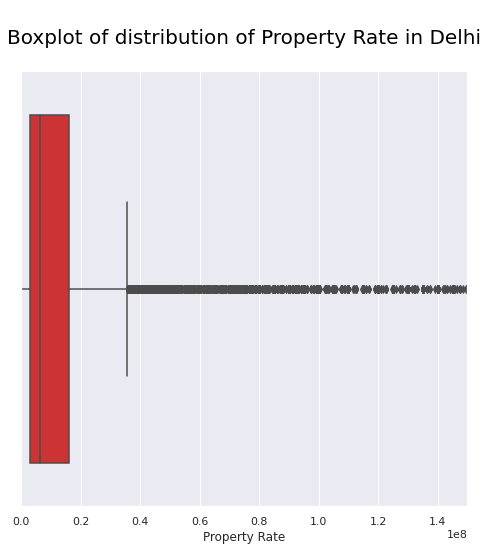

In [ ]:
plt.figure(figsize=(8,8))
j = sns.boxplot(data=list_p, x='listing_price',palette="Set1" )
j.set(xlabel='Property Rate')
j.set(xlim=(0,150000000))
j.set_title("\n" + "Boxplot of distribution of Property Rate in Delhi" + "\n", fontsize=20, color='black')


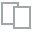
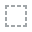
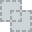
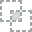
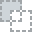
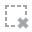
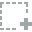
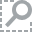
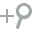
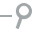
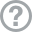
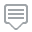
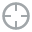
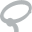
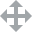
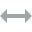
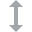
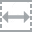
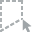
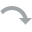
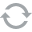
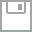
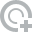
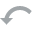
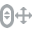
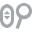
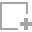
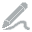
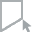
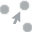
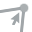
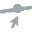

In [ ]:
plot(prop_rate,'rate_k/sq.ft')

***Observations from the Property Rate distribution Analysis***:

*   *Standard deviation being greater than mean implies the property price in Delhi is **not normally distributed** (p-value 5.072674988397786e-25)* -- toggling to the **Q-Q plot** in the above visual show's the **Sample quantiles deviated from the theoretical quantiles**. 
*    *A **large variance** indicates that the property prices are far from the mean property price and far from each other*.
*     *Mean is greater than median indicating a **positively skewed distribution** - more prices on the higher end of the price distribution -- skewness score of 23.43. The longer part of the Interquartile range of the boxplot lies above the median, thus confirming the positive skew.* 

#### ***Property Rate vs Property Type***

In [ ]:
rate_prop = prop_type_p[['prop_type']]
rate_prop['prop_rate'] = prop_rate['rate_k/sq.ft']
rate_prop

prop_type  prop_rate
0      Independent Builder Floor   6,910.00
1      Independent Builder Floor   7,000.00
2      Independent Builder Floor  15,600.00
3              Independent House  16,670.00
4              Independent House   3,690.00
...                          ...        ...
67868  Independent Builder Floor  14,090.00
67869                  Apartment  20,800.00
67870          Independent House   2,800.00
67871                  Apartment   9,440.00
67872  Independent Builder Floor   5,110.00

[67873 rows x 2 columns]

<Figure size 1080x1080 with 0 Axes>

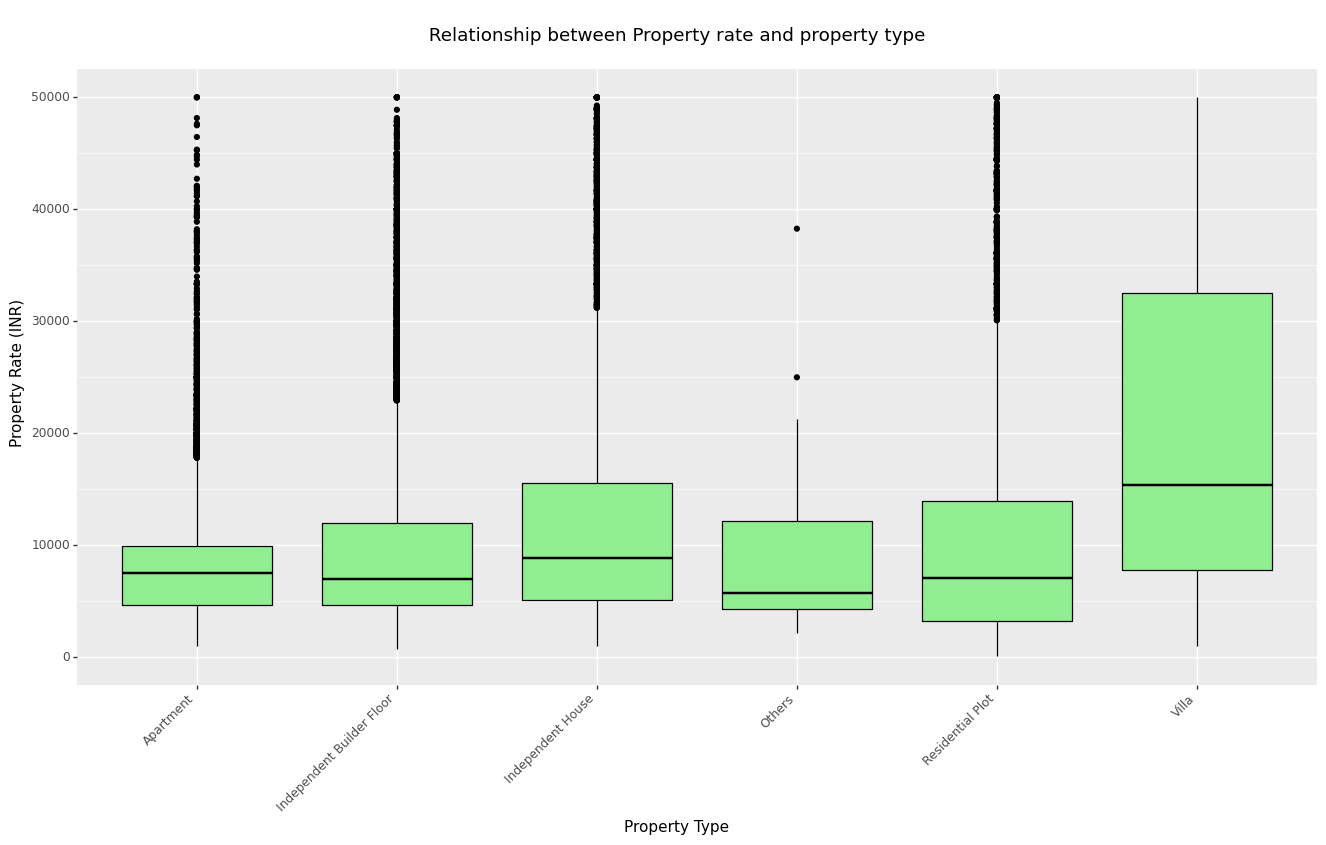

<ggplot: (8728721967941)>

In [143]:
box10 = ggplot(rate_prop, aes(x = 'prop_type', y='prop_rate')) + geom_boxplot(colour="black", fill="lightgreen") + ylim(0,50000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Property Type") + ylab("Property Rate (INR)") + ggtitle("\n Relationship between Property rate and property type \n") 
plt.figure(figsize=(15,15)) 
box10

In [ ]:
p_median = rate_prop.groupby('prop_type', as_index=False)['prop_rate'].median()
p_median = p_median.sort_values(by='prop_rate', ascending=False) 
print("\033[1m" + "Median prop rate - Property rate" + "\033[0m" + "\n")
p_median

Median prop rate - Property rate



prop_type  prop_rate
5                      Villa  19,025.00
2          Independent House   9,680.00
4           Residential Plot   7,690.00
0                  Apartment   7,580.00
1  Independent Builder Floor   7,000.00
3                     Others   5,720.00

#### ***Property Rate vs Property Age***

In [ ]:
rate_age = list_p_age[['property_age_cut']]
rate_age['prop_rate'] = prop_rate['rate_k/sq.ft']
rate_age

property_age_cut  prop_rate
1               (0, 5]   7,000.00
2              (5, 10]  15,600.00
3             (10, 15]  16,670.00
4             (50, 75]   3,690.00
6               (0, 5]   4,440.00
...                ...        ...
67865         (20, 30]  11,260.00
67866          (5, 10]   8,000.00
67870           (0, 5]   2,800.00
67871          (5, 10]   9,440.00
67872          (5, 10]   5,110.00

[34961 rows x 2 columns]

<Figure size 1080x1080 with 0 Axes>

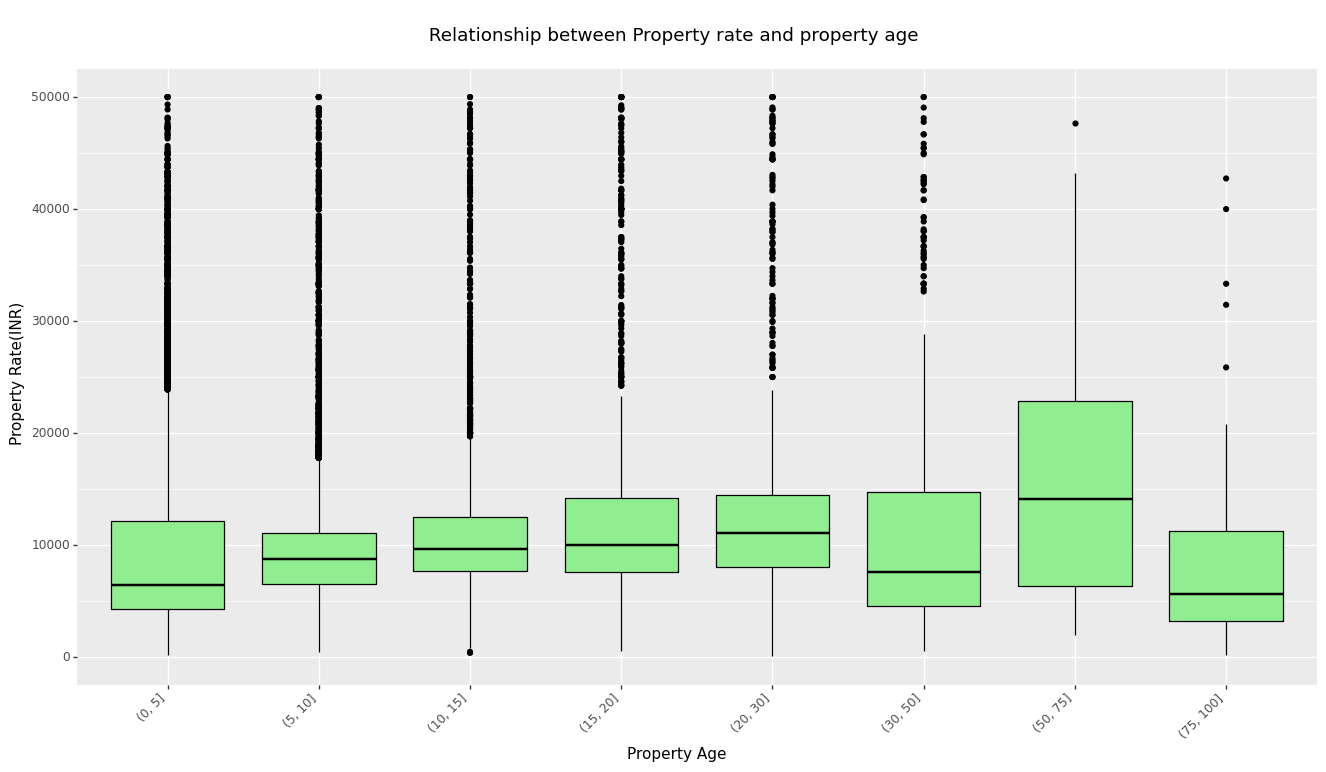

<ggplot: (8728728324621)>

In [ ]:
box10 = ggplot(rate_age, aes(x = 'property_age_cut', y='prop_rate')) + geom_boxplot(colour="black", fill="lightgreen") + ylim(0,50000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Property Age") + ylab("Property Rate(INR)") + ggtitle("\n Relationship between Property rate and property age  \n") 
plt.figure(figsize=(15,15)) 
box10

***There seems to be an overall trend of older properties having higher property rates, except for few anomalies -- drop in median price in property aged 30-50.***

#### ***Probability distribution of prices in the top 4 property types (by count)***

In [148]:
den2 = prop_type_p.copy()
den2['prop_rate'] = prop_rate['rate_k/sq.ft']
den2 = den2[(~den2['prop_type'].isin(['Others'])) ]

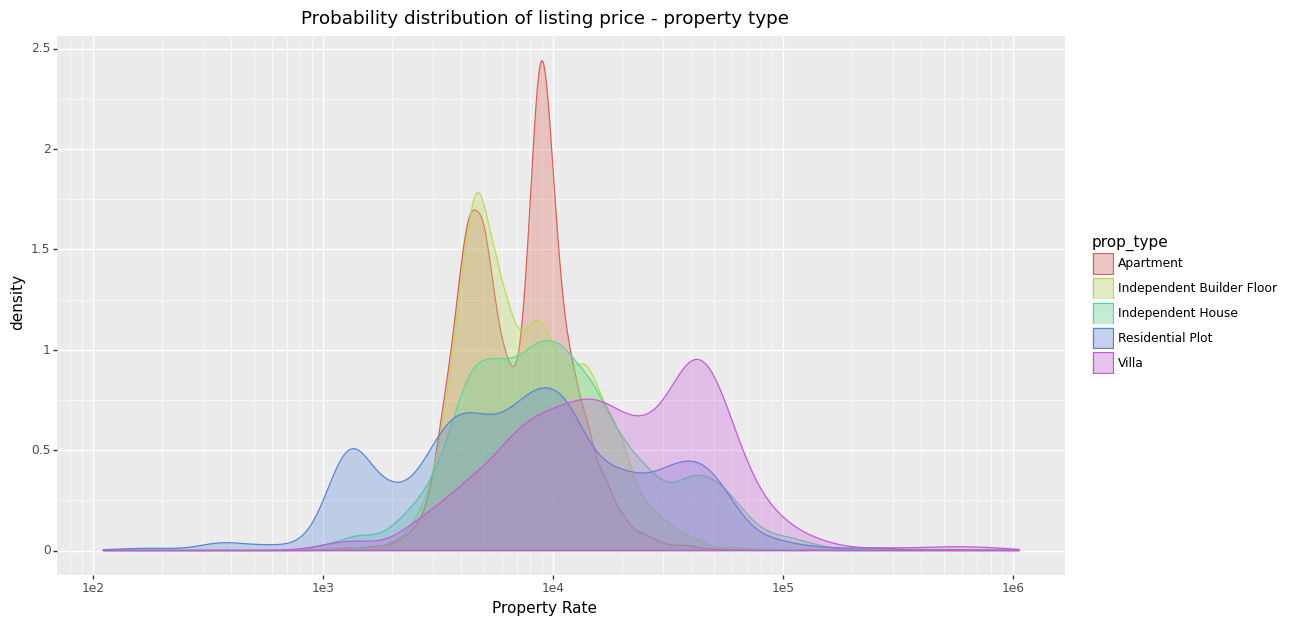

<ggplot: (8728736695421)>

In [149]:
m = ggplot(den2, aes(x='prop_rate', color='prop_type', fill='prop_type'))+ geom_density(adjust = 3/4,alpha=0.3) + scale_x_log10() + theme(figure_size=(13, 7)) + xlab('Property Rate') + ggtitle('Probability distribution of listing price - property type')
m

# ***Locality Average Rate***

#### ***Quantile Statistical Breakdown of Average locality rate***

In [ ]:
print("\033[1m" + "Statistical Breakdown of Average Locality Rates in Delhi" + "\033[0m" + "\n")
d = df['locality_avg_rate'].describe().to_frame()
d

Statistical Breakdown of Average Locality Rates in Delhi



locality_avg_rate
count          63,615.00
mean            7,629.62
std             8,742.02
min               436.00
25%             4,031.00
50%             5,835.00
75%             8,330.00
max           500,000.00

***The median locality average price over all the listed properties in Delhi is INR 5,835.***

#### ***Relationship between average locality rate and property price***

In [ ]:
loc_rate = df[['locality_avg_rate']]
loc_rate['listing_price'] = list_p['listing_price']

Text(0.5, 1.0, '\nRelationship between Property Price vs Average locality rate - lowess fit model line\n')

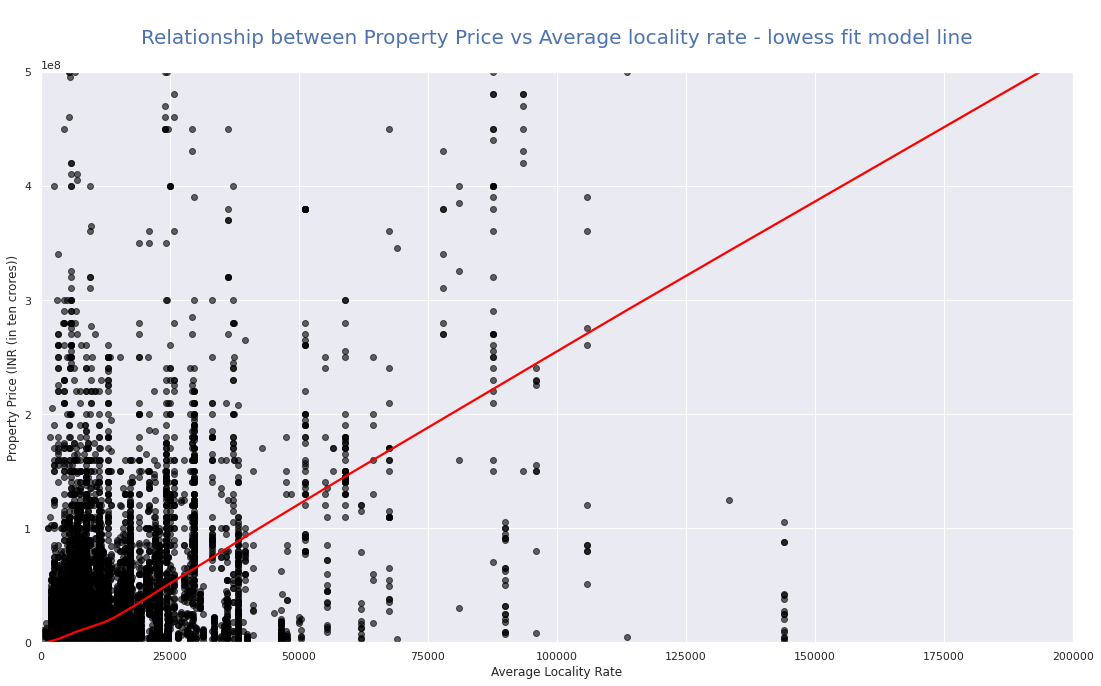

In [ ]:
g = sns.regplot(x='locality_avg_rate', y='listing_price', data=loc_rate, color='black', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'}, lowess=True)
sns.set_theme(color_codes=True)

g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,500000000))
g.set(xlim=(0,200000))
g.set_ylabel("Property Price (INR (in ten crores))")
g.set_xlabel("Average Locality Rate")
g.set_title("\n" + "Relationship between Property Price vs Average locality rate - lowess fit model line" + "\n", fontsize=20, color='b')

***There seems to be an almost linear relationship between Average locality rate and listing price -- insinuating that localities can be priced differenty, which can influence the overall listing price.***

# ***Latitude - Longitude***

In [ ]:
ll = df[['latitude','longitude']]

In [ ]:
ll['combined']=ll['latitude'].astype(str)+'-'+ll['longitude'].astype(str)
ll['combined']

0                28.728903999999996-77.087626
1                         28.673862-77.179932
2                28.538738000000002-77.249095
3                 28.611734999999996-77.08657
4        28.592291999999997-77.30554599999999
                         ...                 
67868                      28.668667-77.10194
67869                     28.634934-77.179282
67870                     28.633881-77.035584
67871                     28.591849-77.036739
67872             28.675946999999997-77.28355
Name: combined, Length: 67873, dtype: object

In [ ]:
ll.combined.nunique()

27981

***There are 27,981 unique lat-long pairs in the dataset.***